In [1063]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import kurtosis, skew
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

import pickle

sns.set(style="ticks", color_codes=True)



In [263]:
train = pd.read_csv('inputMovies.csv')

In [264]:
unique_genres = []

for i in range(0,4803):
    bla = train['genres'].iloc[i].split('"name"')
    for i in range(1,len(bla)-1):
        current = bla[i].split("}")[0][3:-1]
    if current not in unique_genres:
        unique_genres.append(current)
        
    current = bla[len(bla)-1][3:-3]
    if current not in unique_genres:
        unique_genres.append(current)

unique_genres

train.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [308]:
#Dont Run again.

# for uniq in unique_genres:
#     train[uniq] = ""

for i in range(train.shape[0]):
    pp = train['genres'].iloc[i]   
    print(i)
    
    for g in unique_genres:
        if g in pp:
            train[g].iloc[i] = 1
            
            
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705


In [309]:
for col in train.columns:
    print(col)

budget
genres
popularity
runtime
vote_average
vote_count
Days
Fantasy
Science Fiction
Action
Adventure
Crime
Drama
Thriller
Animation
Family
Western
Comedy
Romance
Mystery
Horror
War
History
Music
Documentary
Foreign
TV Movie



In [310]:
train['production_countries'].iloc[1].split(":")
train.shape[0]
unique_prodesh = []

for i in range(0,4803):
    con = train['production_countries'].iloc[i].split('"name": "')
    for i in range(1,len(con)):
        current1 = con[i].split('"}')
        cur=current1[0]
    if cur not in unique_prodesh:
        unique_prodesh.append(cur)

        
  #  current1 = pro[len(bla)-1][3:-3]
   # if current1 not in unique_procom:
    #    unique_procom.append(current1)
    
    
len(unique_prodesh)

KeyError: 'production_countries'

In [277]:
from datetime import date
from datetime import datetime
#train = pd.read_csv('movies.csv')
#rom datetime import date
d1 = datetime(1950, 11, 18)
for i in range(4554,train.shape[0]):
    print(i)
    d0 =train['release_date'].iloc[i]
    d2=datetime.strptime(d0, '%Y-%m-%d')
    delta = d2-d1
    train['Days'].iloc[i] = delta.days

4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753


In [300]:
train['Days'].iloc[train.shape[0] - 1] = 22443

In [301]:
train['Days'].iloc[4794]

22343


 mu = 82260638.65 and sigma = 162840146.37



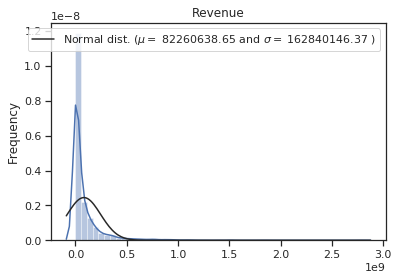

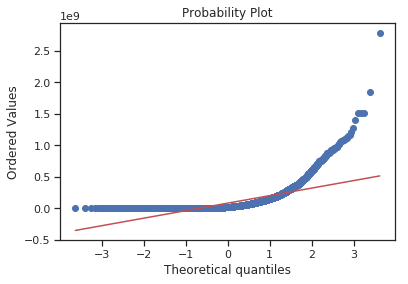

In [314]:
sns.distplot(revenues , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(revenues)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Revenue')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(revenues, plot=plt)
plt.show()

In [315]:
#train['revenue'] = np.log1p(train['revenue'])

train['revenue'] = pd.read_csv('inputMovies.csv')['revenue']


train.shape[0]

4803

In [316]:
del train['spoken_languages']

KeyError: 'spoken_languages'

In [706]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [707]:
from sklearn.model_selection import train_test_split

In [323]:
revenues = train.revenue.values
train.drop(['revenue'],axis= 1, inplace= True)

AttributeError: 'DataFrame' object has no attribute 'revenue'

In [356]:

for gg in unique_genres[1:]:    
    for i in range(0,train.shape[0]-1):
        print(i)
        if(train[gg].iloc[i] == ""):
            train[gg].iloc[i] = 0
 



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104


3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780


720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969


2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676


4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423


1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701


3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432


216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465


2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410


3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099


1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541


3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446


300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549


2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287


3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109


972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
117

2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973


4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762
4763
4764
4765
4766
4767
4768
4769
4770
4771
4772
4773
4774
4775
4776
4777
4778
4779
4780
4781
4782
4783


1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865


3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659


447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696


2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521


4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291


1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539


3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367


31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
2

2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227


3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139


1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229


2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125


54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
31

2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371


3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065


1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210


2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855


4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508


1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683


3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371


96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346


1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171


3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982


983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
11

2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829


4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656


1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778


3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509


385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634


2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515


4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298


KeyError: ''

4759

In [473]:
##Copy
likes = pd.read_csv('./bla.csv')
tweets = pd.read_csv('./abc.csv')

likes.shape[0]
tweets.shape[0]
#tweets = tweets['0.1'].head()

#tweets.columns
# train['likes'] = likes['b']
# train['tweets'] = tweets['b']

#likes=  likes.rename(index= str,columns={"0": "a", "0.1": "c"})


#tweets = tweets.rename(index= str,columns={"0": "a", "0.1": "c"})
#tweets.columns

train[:].iloc[:]

train.shape[0]

likes = likes[:].iloc[:-44]
likes.head()
likes=  likes.rename(index= str,columns={"0": "a", "0.1": "c"})
likes = likes['c']


tweets = tweets[:].iloc[:-44]
tweets.head()
tweets = tweets.rename(index= str,columns={"0": "a", "0.1": "c"})
tweets = tweets['c']

tweets.index = likes.index

train.add(tweets)

train['likes'] = 0

for i in range(0,4715):
    print(i)
    train['likes'].iloc[i] = likes[i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119


3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835


In [486]:
#tweets = tweets.rename(index= str,columns={"0": "a", "0.1": "c"})


for i in range(0,4715):
    print(i)
    train['tweets'].iloc[i] =tweets[i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111


3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802


In [482]:
tweetstrain['tweets'] = 0


for i in range(0,4715):
    print(i)
    train['tweets'].iloc[i] = tweets[i]

NameError: name 'tweetstrain' is not defined

0         0
1         0
2         0
3    180784
4         0
Name: likes, dtype: int64

In [512]:
train.columns

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'Days',
       'Fantasy', 'Science Fiction', 'Action', 'Adventure', 'Crime', 'Drama',
       'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance',
       'Mystery', 'Horror', 'War', 'History', 'Music', 'Documentary',
       'Foreign', 'popularity_index'],
      dtype='object')

In [489]:
train['popularity_index'] = 0

meanlikes = train['likes'].mean()

meantweets = train['tweets'].mean()

for i in range(0,train.shape[0]):
    print(i)
    if(train['tweets'].iloc[i] != 0):
        train['popularity_index'].iloc[i] = train['tweets'].iloc[i]/meantweets
    
    if(train['tweets'].iloc[i] ==0  and train['likes'].iloc[i] != 0):
        train['popularity_index'].iloc[i] = train['likes'].iloc[i] / meanlikes
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121


3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777


In [492]:
meanvote = train['vote_count'].mean()
for i in range(0,train.shape[0]):
    print(i)
    if(train['popularity_index'].iloc[i] == 0 ):
        train['popularity_index'].iloc[i] = train['vote_count'].iloc[i]/meanvote

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161


3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940


In [511]:
del train['tweets']

KeyError: 'tweets'

In [505]:
train.drop(train.columns[len(train.columns)-1], axis=1, inplace=True)

In [526]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [527]:
train.head()

budget  popularity  runtime  vote_average  vote_count   Days Fantasy  \
0  237000000  150.437577    162.0           7.2       11800  21572       1   
1  300000000  139.082615    169.0           6.9        4500  20636       1   
2  245000000  107.376788    148.0           6.3        4466  23718       0   
3  250000000  112.312950    165.0           7.6        9106  22521       0   
4  260000000   43.926995    132.0           6.1        2124  22390       0   

  Science Fiction Action Adventure   ...   Western Comedy Romance Mystery  \
0               1      1         1   ...         0      0       0       0   
1               0      1         1   ...         0      0       0       0   
2               0      1         1   ...         0      0       0       0   
3               0      1         0   ...         0      0       0       0   
4               1      1         1   ...         0      0       0       0   

  Horror War History Music Documentary Foreign  
0      0   0       0     0           0       0  
1      0   0       0     0           0       0  
2      0   0       0     0           0       0  
3      0   0       0     0           0       0  
4      0   0       0     0           0       0  

[5 rows x 25 columns]

In [528]:
X_train, X_test, y_train, y_test = train_test_split(train, revenues, test_size=0.33, random_state=42)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))



In [529]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))





Lasso score: 87785235.0570 (12895076.6815)



In [518]:
#ElasticNet
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#Kernel Ridge regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)




In [519]:

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



ElasticNet score: 87731682.5748 (12930279.5344)

Kernel Ridge score: 92885974.3193 (11597142.5062)



In [522]:
kk = train.copy()

In [525]:
del train['popularity_index']

In [524]:
kk.columns

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'Days',
       'Fantasy', 'Science Fiction', 'Action', 'Adventure', 'Crime', 'Drama',
       'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance',
       'Mystery', 'Horror', 'War', 'History', 'Music', 'Documentary',
       'Foreign', 'popularity_index'],
      dtype='object')

In [558]:
newtrain = pd.read_csv('./inputMovies.csv')

In [559]:
mean = newtrain['runtime'].mean()

newtrain['runtime'] = newtrain['runtime'].fillna(mean)

In [560]:
newtrain.columns


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [561]:
del newtrain['genres']
del newtrain['homepage']
del newtrain['id']
del newtrain['keywords']
del newtrain['original_language']
del newtrain['original_title']
del newtrain['overview']
del newtrain['production_companies']
del newtrain['production_countries']
del newtrain['release_date']
del newtrain['spoken_languages']
del newtrain['status']
del newtrain['tagline']
del newtrain['title']

In [714]:
newtrain.to_csv('./newtrain.csv')

In [564]:
meanbudget = newtrain['budget'].mean()
for i in range(0,newtrain.shape[0]):
    if(newtrain['budget'].iloc[i] == 0):
        newtrain['budget'].iloc[i] = meanbudget

In [566]:
newtrain.to_csv('./newtrain.csv')

In [567]:
meanrevenue = newtrain['revenue'].mean()
for i in range(0,newtrain.shape[0]):
    if(newtrain['revenue'].iloc[i] == 0):
        newtrain['revenue'].iloc[i] = meanrevenue

In [571]:

unique_genres


['Fantasy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Mystery',
 'Horror',
 'War',
 'History',
 'Music',
 'Documentary',
 'Foreign',
 'TV Movie',
 '']

In [ ]:
gg = unique_genres[0]

kk
#Dont Run again.

# for uniq in unique_genres:
#     train[uniq] = ""

for i in range(train.shape[0]):
    pp = train['genres'].iloc[i]   
    print(i)
    
    for g in unique_genres:
        if g in pp:
            train[g].iloc[i] = 1
            
            
        

In [572]:
kk = pd.read_csv('./inputMovies.csv')

newtrain['Fantasy'] = 0

In [583]:
unique_genres

['Fantasy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Mystery',
 'Horror',
 'War',
 'History',
 'Music',
 'Documentary',
 'Foreign',
 'TV Movie',
 '']

In [609]:
newtrain.columns
asd = unique_genres[3:]
asd
            

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'Fantasy', 'Science Fiction', 'Action'],
      dtype='object')

In [593]:
newtrain[gg] = 0
for i in range(newtrain.shape[0]):
    string = kk['genres'].iloc[i]
    print(i)
    
    if gg in string:
        newtrain[gg].iloc[i] = 1
        
    else:
        newtrain[gg].iloc[i] = 0
        
        
    
    
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098


3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806


In [610]:

for current in asd:
    newtrain[current] = 0
    for i in range(0,newtrain.shape[0]):
        string = kk['genres'].iloc[i]
        print(current,i)

        if current in string:
            newtrain[current].iloc[i] = 1

        else:
            newtrain[current].iloc[i] = 0


Adventure 0
Adventure 1
Adventure 2
Adventure 3
Adventure 4
Adventure 5
Adventure 6
Adventure 7
Adventure 8
Adventure 9
Adventure 10
Adventure 11
Adventure 12
Adventure 13
Adventure 14
Adventure 15
Adventure 16
Adventure 17
Adventure 18
Adventure 19
Adventure 20
Adventure 21
Adventure 22
Adventure 23
Adventure 24
Adventure 25
Adventure 26
Adventure 27
Adventure 28
Adventure 29
Adventure 30
Adventure 31
Adventure 32
Adventure 33
Adventure 34
Adventure 35
Adventure 36
Adventure 37
Adventure 38
Adventure 39
Adventure 40
Adventure 41
Adventure 42
Adventure 43
Adventure 44
Adventure 45
Adventure 46
Adventure 47
Adventure 48
Adventure 49
Adventure 50
Adventure 51
Adventure 52
Adventure 53
Adventure 54
Adventure 55
Adventure 56
Adventure 57
Adventure 58
Adventure 59
Adventure 60
Adventure 61
Adventure 62
Adventure 63
Adventure 64
Adventure 65
Adventure 66
Adventure 67
Adventure 68
Adventure 69
Adventure 70
Adventure 71
Adventure 72
Adventure 73
Adventure 74
Adventure 75
Adventure 76
Adventure

Adventure 596
Adventure 597
Adventure 598
Adventure 599
Adventure 600
Adventure 601
Adventure 602
Adventure 603
Adventure 604
Adventure 605
Adventure 606
Adventure 607
Adventure 608
Adventure 609
Adventure 610
Adventure 611
Adventure 612
Adventure 613
Adventure 614
Adventure 615
Adventure 616
Adventure 617
Adventure 618
Adventure 619
Adventure 620
Adventure 621
Adventure 622
Adventure 623
Adventure 624
Adventure 625
Adventure 626
Adventure 627
Adventure 628
Adventure 629
Adventure 630
Adventure 631
Adventure 632
Adventure 633
Adventure 634
Adventure 635
Adventure 636
Adventure 637
Adventure 638
Adventure 639
Adventure 640
Adventure 641
Adventure 642
Adventure 643
Adventure 644
Adventure 645
Adventure 646
Adventure 647
Adventure 648
Adventure 649
Adventure 650
Adventure 651
Adventure 652
Adventure 653
Adventure 654
Adventure 655
Adventure 656
Adventure 657
Adventure 658
Adventure 659
Adventure 660
Adventure 661
Adventure 662
Adventure 663
Adventure 664
Adventure 665
Adventure 666
Advent

Adventure 1204
Adventure 1205
Adventure 1206
Adventure 1207
Adventure 1208
Adventure 1209
Adventure 1210
Adventure 1211
Adventure 1212
Adventure 1213
Adventure 1214
Adventure 1215
Adventure 1216
Adventure 1217
Adventure 1218
Adventure 1219
Adventure 1220
Adventure 1221
Adventure 1222
Adventure 1223
Adventure 1224
Adventure 1225
Adventure 1226
Adventure 1227
Adventure 1228
Adventure 1229
Adventure 1230
Adventure 1231
Adventure 1232
Adventure 1233
Adventure 1234
Adventure 1235
Adventure 1236
Adventure 1237
Adventure 1238
Adventure 1239
Adventure 1240
Adventure 1241
Adventure 1242
Adventure 1243
Adventure 1244
Adventure 1245
Adventure 1246
Adventure 1247
Adventure 1248
Adventure 1249
Adventure 1250
Adventure 1251
Adventure 1252
Adventure 1253
Adventure 1254
Adventure 1255
Adventure 1256
Adventure 1257
Adventure 1258
Adventure 1259
Adventure 1260
Adventure 1261
Adventure 1262
Adventure 1263
Adventure 1264
Adventure 1265
Adventure 1266
Adventure 1267
Adventure 1268
Adventure 1269
Adventure 

Adventure 1798
Adventure 1799
Adventure 1800
Adventure 1801
Adventure 1802
Adventure 1803
Adventure 1804
Adventure 1805
Adventure 1806
Adventure 1807
Adventure 1808
Adventure 1809
Adventure 1810
Adventure 1811
Adventure 1812
Adventure 1813
Adventure 1814
Adventure 1815
Adventure 1816
Adventure 1817
Adventure 1818
Adventure 1819
Adventure 1820
Adventure 1821
Adventure 1822
Adventure 1823
Adventure 1824
Adventure 1825
Adventure 1826
Adventure 1827
Adventure 1828
Adventure 1829
Adventure 1830
Adventure 1831
Adventure 1832
Adventure 1833
Adventure 1834
Adventure 1835
Adventure 1836
Adventure 1837
Adventure 1838
Adventure 1839
Adventure 1840
Adventure 1841
Adventure 1842
Adventure 1843
Adventure 1844
Adventure 1845
Adventure 1846
Adventure 1847
Adventure 1848
Adventure 1849
Adventure 1850
Adventure 1851
Adventure 1852
Adventure 1853
Adventure 1854
Adventure 1855
Adventure 1856
Adventure 1857
Adventure 1858
Adventure 1859
Adventure 1860
Adventure 1861
Adventure 1862
Adventure 1863
Adventure 

Adventure 2437
Adventure 2438
Adventure 2439
Adventure 2440
Adventure 2441
Adventure 2442
Adventure 2443
Adventure 2444
Adventure 2445
Adventure 2446
Adventure 2447
Adventure 2448
Adventure 2449
Adventure 2450
Adventure 2451
Adventure 2452
Adventure 2453
Adventure 2454
Adventure 2455
Adventure 2456
Adventure 2457
Adventure 2458
Adventure 2459
Adventure 2460
Adventure 2461
Adventure 2462
Adventure 2463
Adventure 2464
Adventure 2465
Adventure 2466
Adventure 2467
Adventure 2468
Adventure 2469
Adventure 2470
Adventure 2471
Adventure 2472
Adventure 2473
Adventure 2474
Adventure 2475
Adventure 2476
Adventure 2477
Adventure 2478
Adventure 2479
Adventure 2480
Adventure 2481
Adventure 2482
Adventure 2483
Adventure 2484
Adventure 2485
Adventure 2486
Adventure 2487
Adventure 2488
Adventure 2489
Adventure 2490
Adventure 2491
Adventure 2492
Adventure 2493
Adventure 2494
Adventure 2495
Adventure 2496
Adventure 2497
Adventure 2498
Adventure 2499
Adventure 2500
Adventure 2501
Adventure 2502
Adventure 

Adventure 3025
Adventure 3026
Adventure 3027
Adventure 3028
Adventure 3029
Adventure 3030
Adventure 3031
Adventure 3032
Adventure 3033
Adventure 3034
Adventure 3035
Adventure 3036
Adventure 3037
Adventure 3038
Adventure 3039
Adventure 3040
Adventure 3041
Adventure 3042
Adventure 3043
Adventure 3044
Adventure 3045
Adventure 3046
Adventure 3047
Adventure 3048
Adventure 3049
Adventure 3050
Adventure 3051
Adventure 3052
Adventure 3053
Adventure 3054
Adventure 3055
Adventure 3056
Adventure 3057
Adventure 3058
Adventure 3059
Adventure 3060
Adventure 3061
Adventure 3062
Adventure 3063
Adventure 3064
Adventure 3065
Adventure 3066
Adventure 3067
Adventure 3068
Adventure 3069
Adventure 3070
Adventure 3071
Adventure 3072
Adventure 3073
Adventure 3074
Adventure 3075
Adventure 3076
Adventure 3077
Adventure 3078
Adventure 3079
Adventure 3080
Adventure 3081
Adventure 3082
Adventure 3083
Adventure 3084
Adventure 3085
Adventure 3086
Adventure 3087
Adventure 3088
Adventure 3089
Adventure 3090
Adventure 

Adventure 3585
Adventure 3586
Adventure 3587
Adventure 3588
Adventure 3589
Adventure 3590
Adventure 3591
Adventure 3592
Adventure 3593
Adventure 3594
Adventure 3595
Adventure 3596
Adventure 3597
Adventure 3598
Adventure 3599
Adventure 3600
Adventure 3601
Adventure 3602
Adventure 3603
Adventure 3604
Adventure 3605
Adventure 3606
Adventure 3607
Adventure 3608
Adventure 3609
Adventure 3610
Adventure 3611
Adventure 3612
Adventure 3613
Adventure 3614
Adventure 3615
Adventure 3616
Adventure 3617
Adventure 3618
Adventure 3619
Adventure 3620
Adventure 3621
Adventure 3622
Adventure 3623
Adventure 3624
Adventure 3625
Adventure 3626
Adventure 3627
Adventure 3628
Adventure 3629
Adventure 3630
Adventure 3631
Adventure 3632
Adventure 3633
Adventure 3634
Adventure 3635
Adventure 3636
Adventure 3637
Adventure 3638
Adventure 3639
Adventure 3640
Adventure 3641
Adventure 3642
Adventure 3643
Adventure 3644
Adventure 3645
Adventure 3646
Adventure 3647
Adventure 3648
Adventure 3649
Adventure 3650
Adventure 

Adventure 4151
Adventure 4152
Adventure 4153
Adventure 4154
Adventure 4155
Adventure 4156
Adventure 4157
Adventure 4158
Adventure 4159
Adventure 4160
Adventure 4161
Adventure 4162
Adventure 4163
Adventure 4164
Adventure 4165
Adventure 4166
Adventure 4167
Adventure 4168
Adventure 4169
Adventure 4170
Adventure 4171
Adventure 4172
Adventure 4173
Adventure 4174
Adventure 4175
Adventure 4176
Adventure 4177
Adventure 4178
Adventure 4179
Adventure 4180
Adventure 4181
Adventure 4182
Adventure 4183
Adventure 4184
Adventure 4185
Adventure 4186
Adventure 4187
Adventure 4188
Adventure 4189
Adventure 4190
Adventure 4191
Adventure 4192
Adventure 4193
Adventure 4194
Adventure 4195
Adventure 4196
Adventure 4197
Adventure 4198
Adventure 4199
Adventure 4200
Adventure 4201
Adventure 4202
Adventure 4203
Adventure 4204
Adventure 4205
Adventure 4206
Adventure 4207
Adventure 4208
Adventure 4209
Adventure 4210
Adventure 4211
Adventure 4212
Adventure 4213
Adventure 4214
Adventure 4215
Adventure 4216
Adventure 

Adventure 4720
Adventure 4721
Adventure 4722
Adventure 4723
Adventure 4724
Adventure 4725
Adventure 4726
Adventure 4727
Adventure 4728
Adventure 4729
Adventure 4730
Adventure 4731
Adventure 4732
Adventure 4733
Adventure 4734
Adventure 4735
Adventure 4736
Adventure 4737
Adventure 4738
Adventure 4739
Adventure 4740
Adventure 4741
Adventure 4742
Adventure 4743
Adventure 4744
Adventure 4745
Adventure 4746
Adventure 4747
Adventure 4748
Adventure 4749
Adventure 4750
Adventure 4751
Adventure 4752
Adventure 4753
Adventure 4754
Adventure 4755
Adventure 4756
Adventure 4757
Adventure 4758
Adventure 4759
Adventure 4760
Adventure 4761
Adventure 4762
Adventure 4763
Adventure 4764
Adventure 4765
Adventure 4766
Adventure 4767
Adventure 4768
Adventure 4769
Adventure 4770
Adventure 4771
Adventure 4772
Adventure 4773
Adventure 4774
Adventure 4775
Adventure 4776
Adventure 4777
Adventure 4778
Adventure 4779
Adventure 4780
Adventure 4781
Adventure 4782
Adventure 4783
Adventure 4784
Adventure 4785
Adventure 

Crime 777
Crime 778
Crime 779
Crime 780
Crime 781
Crime 782
Crime 783
Crime 784
Crime 785
Crime 786
Crime 787
Crime 788
Crime 789
Crime 790
Crime 791
Crime 792
Crime 793
Crime 794
Crime 795
Crime 796
Crime 797
Crime 798
Crime 799
Crime 800
Crime 801
Crime 802
Crime 803
Crime 804
Crime 805
Crime 806
Crime 807
Crime 808
Crime 809
Crime 810
Crime 811
Crime 812
Crime 813
Crime 814
Crime 815
Crime 816
Crime 817
Crime 818
Crime 819
Crime 820
Crime 821
Crime 822
Crime 823
Crime 824
Crime 825
Crime 826
Crime 827
Crime 828
Crime 829
Crime 830
Crime 831
Crime 832
Crime 833
Crime 834
Crime 835
Crime 836
Crime 837
Crime 838
Crime 839
Crime 840
Crime 841
Crime 842
Crime 843
Crime 844
Crime 845
Crime 846
Crime 847
Crime 848
Crime 849
Crime 850
Crime 851
Crime 852
Crime 853
Crime 854
Crime 855
Crime 856
Crime 857
Crime 858
Crime 859
Crime 860
Crime 861
Crime 862
Crime 863
Crime 864
Crime 865
Crime 866
Crime 867
Crime 868
Crime 869
Crime 870
Crime 871
Crime 872
Crime 873
Crime 874
Crime 875
Crime 876


Crime 1674
Crime 1675
Crime 1676
Crime 1677
Crime 1678
Crime 1679
Crime 1680
Crime 1681
Crime 1682
Crime 1683
Crime 1684
Crime 1685
Crime 1686
Crime 1687
Crime 1688
Crime 1689
Crime 1690
Crime 1691
Crime 1692
Crime 1693
Crime 1694
Crime 1695
Crime 1696
Crime 1697
Crime 1698
Crime 1699
Crime 1700
Crime 1701
Crime 1702
Crime 1703
Crime 1704
Crime 1705
Crime 1706
Crime 1707
Crime 1708
Crime 1709
Crime 1710
Crime 1711
Crime 1712
Crime 1713
Crime 1714
Crime 1715
Crime 1716
Crime 1717
Crime 1718
Crime 1719
Crime 1720
Crime 1721
Crime 1722
Crime 1723
Crime 1724
Crime 1725
Crime 1726
Crime 1727
Crime 1728
Crime 1729
Crime 1730
Crime 1731
Crime 1732
Crime 1733
Crime 1734
Crime 1735
Crime 1736
Crime 1737
Crime 1738
Crime 1739
Crime 1740
Crime 1741
Crime 1742
Crime 1743
Crime 1744
Crime 1745
Crime 1746
Crime 1747
Crime 1748
Crime 1749
Crime 1750
Crime 1751
Crime 1752
Crime 1753
Crime 1754
Crime 1755
Crime 1756
Crime 1757
Crime 1758
Crime 1759
Crime 1760
Crime 1761
Crime 1762
Crime 1763
Crime 1764

Crime 2523
Crime 2524
Crime 2525
Crime 2526
Crime 2527
Crime 2528
Crime 2529
Crime 2530
Crime 2531
Crime 2532
Crime 2533
Crime 2534
Crime 2535
Crime 2536
Crime 2537
Crime 2538
Crime 2539
Crime 2540
Crime 2541
Crime 2542
Crime 2543
Crime 2544
Crime 2545
Crime 2546
Crime 2547
Crime 2548
Crime 2549
Crime 2550
Crime 2551
Crime 2552
Crime 2553
Crime 2554
Crime 2555
Crime 2556
Crime 2557
Crime 2558
Crime 2559
Crime 2560
Crime 2561
Crime 2562
Crime 2563
Crime 2564
Crime 2565
Crime 2566
Crime 2567
Crime 2568
Crime 2569
Crime 2570
Crime 2571
Crime 2572
Crime 2573
Crime 2574
Crime 2575
Crime 2576
Crime 2577
Crime 2578
Crime 2579
Crime 2580
Crime 2581
Crime 2582
Crime 2583
Crime 2584
Crime 2585
Crime 2586
Crime 2587
Crime 2588
Crime 2589
Crime 2590
Crime 2591
Crime 2592
Crime 2593
Crime 2594
Crime 2595
Crime 2596
Crime 2597
Crime 2598
Crime 2599
Crime 2600
Crime 2601
Crime 2602
Crime 2603
Crime 2604
Crime 2605
Crime 2606
Crime 2607
Crime 2608
Crime 2609
Crime 2610
Crime 2611
Crime 2612
Crime 2613

Crime 3271
Crime 3272
Crime 3273
Crime 3274
Crime 3275
Crime 3276
Crime 3277
Crime 3278
Crime 3279
Crime 3280
Crime 3281
Crime 3282
Crime 3283
Crime 3284
Crime 3285
Crime 3286
Crime 3287
Crime 3288
Crime 3289
Crime 3290
Crime 3291
Crime 3292
Crime 3293
Crime 3294
Crime 3295
Crime 3296
Crime 3297
Crime 3298
Crime 3299
Crime 3300
Crime 3301
Crime 3302
Crime 3303
Crime 3304
Crime 3305
Crime 3306
Crime 3307
Crime 3308
Crime 3309
Crime 3310
Crime 3311
Crime 3312
Crime 3313
Crime 3314
Crime 3315
Crime 3316
Crime 3317
Crime 3318
Crime 3319
Crime 3320
Crime 3321
Crime 3322
Crime 3323
Crime 3324
Crime 3325
Crime 3326
Crime 3327
Crime 3328
Crime 3329
Crime 3330
Crime 3331
Crime 3332
Crime 3333
Crime 3334
Crime 3335
Crime 3336
Crime 3337
Crime 3338
Crime 3339
Crime 3340
Crime 3341
Crime 3342
Crime 3343
Crime 3344
Crime 3345
Crime 3346
Crime 3347
Crime 3348
Crime 3349
Crime 3350
Crime 3351
Crime 3352
Crime 3353
Crime 3354
Crime 3355
Crime 3356
Crime 3357
Crime 3358
Crime 3359
Crime 3360
Crime 3361

Crime 4020
Crime 4021
Crime 4022
Crime 4023
Crime 4024
Crime 4025
Crime 4026
Crime 4027
Crime 4028
Crime 4029
Crime 4030
Crime 4031
Crime 4032
Crime 4033
Crime 4034
Crime 4035
Crime 4036
Crime 4037
Crime 4038
Crime 4039
Crime 4040
Crime 4041
Crime 4042
Crime 4043
Crime 4044
Crime 4045
Crime 4046
Crime 4047
Crime 4048
Crime 4049
Crime 4050
Crime 4051
Crime 4052
Crime 4053
Crime 4054
Crime 4055
Crime 4056
Crime 4057
Crime 4058
Crime 4059
Crime 4060
Crime 4061
Crime 4062
Crime 4063
Crime 4064
Crime 4065
Crime 4066
Crime 4067
Crime 4068
Crime 4069
Crime 4070
Crime 4071
Crime 4072
Crime 4073
Crime 4074
Crime 4075
Crime 4076
Crime 4077
Crime 4078
Crime 4079
Crime 4080
Crime 4081
Crime 4082
Crime 4083
Crime 4084
Crime 4085
Crime 4086
Crime 4087
Crime 4088
Crime 4089
Crime 4090
Crime 4091
Crime 4092
Crime 4093
Crime 4094
Crime 4095
Crime 4096
Crime 4097
Crime 4098
Crime 4099
Crime 4100
Crime 4101
Crime 4102
Crime 4103
Crime 4104
Crime 4105
Crime 4106
Crime 4107
Crime 4108
Crime 4109
Crime 4110

Crime 4768
Crime 4769
Crime 4770
Crime 4771
Crime 4772
Crime 4773
Crime 4774
Crime 4775
Crime 4776
Crime 4777
Crime 4778
Crime 4779
Crime 4780
Crime 4781
Crime 4782
Crime 4783
Crime 4784
Crime 4785
Crime 4786
Crime 4787
Crime 4788
Crime 4789
Crime 4790
Crime 4791
Crime 4792
Crime 4793
Crime 4794
Crime 4795
Crime 4796
Crime 4797
Crime 4798
Crime 4799
Crime 4800
Crime 4801
Crime 4802
Drama 0
Drama 1
Drama 2
Drama 3
Drama 4
Drama 5
Drama 6
Drama 7
Drama 8
Drama 9
Drama 10
Drama 11
Drama 12
Drama 13
Drama 14
Drama 15
Drama 16
Drama 17
Drama 18
Drama 19
Drama 20
Drama 21
Drama 22
Drama 23
Drama 24
Drama 25
Drama 26
Drama 27
Drama 28
Drama 29
Drama 30
Drama 31
Drama 32
Drama 33
Drama 34
Drama 35
Drama 36
Drama 37
Drama 38
Drama 39
Drama 40
Drama 41
Drama 42
Drama 43
Drama 44
Drama 45
Drama 46
Drama 47
Drama 48
Drama 49
Drama 50
Drama 51
Drama 52
Drama 53
Drama 54
Drama 55
Drama 56
Drama 57
Drama 58
Drama 59
Drama 60
Drama 61
Drama 62
Drama 63
Drama 64
Drama 65
Drama 66
Drama 67
Drama 68
Dram

Drama 872
Drama 873
Drama 874
Drama 875
Drama 876
Drama 877
Drama 878
Drama 879
Drama 880
Drama 881
Drama 882
Drama 883
Drama 884
Drama 885
Drama 886
Drama 887
Drama 888
Drama 889
Drama 890
Drama 891
Drama 892
Drama 893
Drama 894
Drama 895
Drama 896
Drama 897
Drama 898
Drama 899
Drama 900
Drama 901
Drama 902
Drama 903
Drama 904
Drama 905
Drama 906
Drama 907
Drama 908
Drama 909
Drama 910
Drama 911
Drama 912
Drama 913
Drama 914
Drama 915
Drama 916
Drama 917
Drama 918
Drama 919
Drama 920
Drama 921
Drama 922
Drama 923
Drama 924
Drama 925
Drama 926
Drama 927
Drama 928
Drama 929
Drama 930
Drama 931
Drama 932
Drama 933
Drama 934
Drama 935
Drama 936
Drama 937
Drama 938
Drama 939
Drama 940
Drama 941
Drama 942
Drama 943
Drama 944
Drama 945
Drama 946
Drama 947
Drama 948
Drama 949
Drama 950
Drama 951
Drama 952
Drama 953
Drama 954
Drama 955
Drama 956
Drama 957
Drama 958
Drama 959
Drama 960
Drama 961
Drama 962
Drama 963
Drama 964
Drama 965
Drama 966
Drama 967
Drama 968
Drama 969
Drama 970
Drama 971


Drama 1712
Drama 1713
Drama 1714
Drama 1715
Drama 1716
Drama 1717
Drama 1718
Drama 1719
Drama 1720
Drama 1721
Drama 1722
Drama 1723
Drama 1724
Drama 1725
Drama 1726
Drama 1727
Drama 1728
Drama 1729
Drama 1730
Drama 1731
Drama 1732
Drama 1733
Drama 1734
Drama 1735
Drama 1736
Drama 1737
Drama 1738
Drama 1739
Drama 1740
Drama 1741
Drama 1742
Drama 1743
Drama 1744
Drama 1745
Drama 1746
Drama 1747
Drama 1748
Drama 1749
Drama 1750
Drama 1751
Drama 1752
Drama 1753
Drama 1754
Drama 1755
Drama 1756
Drama 1757
Drama 1758
Drama 1759
Drama 1760
Drama 1761
Drama 1762
Drama 1763
Drama 1764
Drama 1765
Drama 1766
Drama 1767
Drama 1768
Drama 1769
Drama 1770
Drama 1771
Drama 1772
Drama 1773
Drama 1774
Drama 1775
Drama 1776
Drama 1777
Drama 1778
Drama 1779
Drama 1780
Drama 1781
Drama 1782
Drama 1783
Drama 1784
Drama 1785
Drama 1786
Drama 1787
Drama 1788
Drama 1789
Drama 1790
Drama 1791
Drama 1792
Drama 1793
Drama 1794
Drama 1795
Drama 1796
Drama 1797
Drama 1798
Drama 1799
Drama 1800
Drama 1801
Drama 1802

Drama 2460
Drama 2461
Drama 2462
Drama 2463
Drama 2464
Drama 2465
Drama 2466
Drama 2467
Drama 2468
Drama 2469
Drama 2470
Drama 2471
Drama 2472
Drama 2473
Drama 2474
Drama 2475
Drama 2476
Drama 2477
Drama 2478
Drama 2479
Drama 2480
Drama 2481
Drama 2482
Drama 2483
Drama 2484
Drama 2485
Drama 2486
Drama 2487
Drama 2488
Drama 2489
Drama 2490
Drama 2491
Drama 2492
Drama 2493
Drama 2494
Drama 2495
Drama 2496
Drama 2497
Drama 2498
Drama 2499
Drama 2500
Drama 2501
Drama 2502
Drama 2503
Drama 2504
Drama 2505
Drama 2506
Drama 2507
Drama 2508
Drama 2509
Drama 2510
Drama 2511
Drama 2512
Drama 2513
Drama 2514
Drama 2515
Drama 2516
Drama 2517
Drama 2518
Drama 2519
Drama 2520
Drama 2521
Drama 2522
Drama 2523
Drama 2524
Drama 2525
Drama 2526
Drama 2527
Drama 2528
Drama 2529
Drama 2530
Drama 2531
Drama 2532
Drama 2533
Drama 2534
Drama 2535
Drama 2536
Drama 2537
Drama 2538
Drama 2539
Drama 2540
Drama 2541
Drama 2542
Drama 2543
Drama 2544
Drama 2545
Drama 2546
Drama 2547
Drama 2548
Drama 2549
Drama 2550

Drama 3209
Drama 3210
Drama 3211
Drama 3212
Drama 3213
Drama 3214
Drama 3215
Drama 3216
Drama 3217
Drama 3218
Drama 3219
Drama 3220
Drama 3221
Drama 3222
Drama 3223
Drama 3224
Drama 3225
Drama 3226
Drama 3227
Drama 3228
Drama 3229
Drama 3230
Drama 3231
Drama 3232
Drama 3233
Drama 3234
Drama 3235
Drama 3236
Drama 3237
Drama 3238
Drama 3239
Drama 3240
Drama 3241
Drama 3242
Drama 3243
Drama 3244
Drama 3245
Drama 3246
Drama 3247
Drama 3248
Drama 3249
Drama 3250
Drama 3251
Drama 3252
Drama 3253
Drama 3254
Drama 3255
Drama 3256
Drama 3257
Drama 3258
Drama 3259
Drama 3260
Drama 3261
Drama 3262
Drama 3263
Drama 3264
Drama 3265
Drama 3266
Drama 3267
Drama 3268
Drama 3269
Drama 3270
Drama 3271
Drama 3272
Drama 3273
Drama 3274
Drama 3275
Drama 3276
Drama 3277
Drama 3278
Drama 3279
Drama 3280
Drama 3281
Drama 3282
Drama 3283
Drama 3284
Drama 3285
Drama 3286
Drama 3287
Drama 3288
Drama 3289
Drama 3290
Drama 3291
Drama 3292
Drama 3293
Drama 3294
Drama 3295
Drama 3296
Drama 3297
Drama 3298
Drama 3299

Drama 3957
Drama 3958
Drama 3959
Drama 3960
Drama 3961
Drama 3962
Drama 3963
Drama 3964
Drama 3965
Drama 3966
Drama 3967
Drama 3968
Drama 3969
Drama 3970
Drama 3971
Drama 3972
Drama 3973
Drama 3974
Drama 3975
Drama 3976
Drama 3977
Drama 3978
Drama 3979
Drama 3980
Drama 3981
Drama 3982
Drama 3983
Drama 3984
Drama 3985
Drama 3986
Drama 3987
Drama 3988
Drama 3989
Drama 3990
Drama 3991
Drama 3992
Drama 3993
Drama 3994
Drama 3995
Drama 3996
Drama 3997
Drama 3998
Drama 3999
Drama 4000
Drama 4001
Drama 4002
Drama 4003
Drama 4004
Drama 4005
Drama 4006
Drama 4007
Drama 4008
Drama 4009
Drama 4010
Drama 4011
Drama 4012
Drama 4013
Drama 4014
Drama 4015
Drama 4016
Drama 4017
Drama 4018
Drama 4019
Drama 4020
Drama 4021
Drama 4022
Drama 4023
Drama 4024
Drama 4025
Drama 4026
Drama 4027
Drama 4028
Drama 4029
Drama 4030
Drama 4031
Drama 4032
Drama 4033
Drama 4034
Drama 4035
Drama 4036
Drama 4037
Drama 4038
Drama 4039
Drama 4040
Drama 4041
Drama 4042
Drama 4043
Drama 4044
Drama 4045
Drama 4046
Drama 4047

Drama 4706
Drama 4707
Drama 4708
Drama 4709
Drama 4710
Drama 4711
Drama 4712
Drama 4713
Drama 4714
Drama 4715
Drama 4716
Drama 4717
Drama 4718
Drama 4719
Drama 4720
Drama 4721
Drama 4722
Drama 4723
Drama 4724
Drama 4725
Drama 4726
Drama 4727
Drama 4728
Drama 4729
Drama 4730
Drama 4731
Drama 4732
Drama 4733
Drama 4734
Drama 4735
Drama 4736
Drama 4737
Drama 4738
Drama 4739
Drama 4740
Drama 4741
Drama 4742
Drama 4743
Drama 4744
Drama 4745
Drama 4746
Drama 4747
Drama 4748
Drama 4749
Drama 4750
Drama 4751
Drama 4752
Drama 4753
Drama 4754
Drama 4755
Drama 4756
Drama 4757
Drama 4758
Drama 4759
Drama 4760
Drama 4761
Drama 4762
Drama 4763
Drama 4764
Drama 4765
Drama 4766
Drama 4767
Drama 4768
Drama 4769
Drama 4770
Drama 4771
Drama 4772
Drama 4773
Drama 4774
Drama 4775
Drama 4776
Drama 4777
Drama 4778
Drama 4779
Drama 4780
Drama 4781
Drama 4782
Drama 4783
Drama 4784
Drama 4785
Drama 4786
Drama 4787
Drama 4788
Drama 4789
Drama 4790
Drama 4791
Drama 4792
Drama 4793
Drama 4794
Drama 4795
Drama 4796

Thriller 639
Thriller 640
Thriller 641
Thriller 642
Thriller 643
Thriller 644
Thriller 645
Thriller 646
Thriller 647
Thriller 648
Thriller 649
Thriller 650
Thriller 651
Thriller 652
Thriller 653
Thriller 654
Thriller 655
Thriller 656
Thriller 657
Thriller 658
Thriller 659
Thriller 660
Thriller 661
Thriller 662
Thriller 663
Thriller 664
Thriller 665
Thriller 666
Thriller 667
Thriller 668
Thriller 669
Thriller 670
Thriller 671
Thriller 672
Thriller 673
Thriller 674
Thriller 675
Thriller 676
Thriller 677
Thriller 678
Thriller 679
Thriller 680
Thriller 681
Thriller 682
Thriller 683
Thriller 684
Thriller 685
Thriller 686
Thriller 687
Thriller 688
Thriller 689
Thriller 690
Thriller 691
Thriller 692
Thriller 693
Thriller 694
Thriller 695
Thriller 696
Thriller 697
Thriller 698
Thriller 699
Thriller 700
Thriller 701
Thriller 702
Thriller 703
Thriller 704
Thriller 705
Thriller 706
Thriller 707
Thriller 708
Thriller 709
Thriller 710
Thriller 711
Thriller 712
Thriller 713
Thriller 714
Thriller 715

Thriller 1401
Thriller 1402
Thriller 1403
Thriller 1404
Thriller 1405
Thriller 1406
Thriller 1407
Thriller 1408
Thriller 1409
Thriller 1410
Thriller 1411
Thriller 1412
Thriller 1413
Thriller 1414
Thriller 1415
Thriller 1416
Thriller 1417
Thriller 1418
Thriller 1419
Thriller 1420
Thriller 1421
Thriller 1422
Thriller 1423
Thriller 1424
Thriller 1425
Thriller 1426
Thriller 1427
Thriller 1428
Thriller 1429
Thriller 1430
Thriller 1431
Thriller 1432
Thriller 1433
Thriller 1434
Thriller 1435
Thriller 1436
Thriller 1437
Thriller 1438
Thriller 1439
Thriller 1440
Thriller 1441
Thriller 1442
Thriller 1443
Thriller 1444
Thriller 1445
Thriller 1446
Thriller 1447
Thriller 1448
Thriller 1449
Thriller 1450
Thriller 1451
Thriller 1452
Thriller 1453
Thriller 1454
Thriller 1455
Thriller 1456
Thriller 1457
Thriller 1458
Thriller 1459
Thriller 1460
Thriller 1461
Thriller 1462
Thriller 1463
Thriller 1464
Thriller 1465
Thriller 1466
Thriller 1467
Thriller 1468
Thriller 1469
Thriller 1470
Thriller 1471
Thrill

Thriller 2086
Thriller 2087
Thriller 2088
Thriller 2089
Thriller 2090
Thriller 2091
Thriller 2092
Thriller 2093
Thriller 2094
Thriller 2095
Thriller 2096
Thriller 2097
Thriller 2098
Thriller 2099
Thriller 2100
Thriller 2101
Thriller 2102
Thriller 2103
Thriller 2104
Thriller 2105
Thriller 2106
Thriller 2107
Thriller 2108
Thriller 2109
Thriller 2110
Thriller 2111
Thriller 2112
Thriller 2113
Thriller 2114
Thriller 2115
Thriller 2116
Thriller 2117
Thriller 2118
Thriller 2119
Thriller 2120
Thriller 2121
Thriller 2122
Thriller 2123
Thriller 2124
Thriller 2125
Thriller 2126
Thriller 2127
Thriller 2128
Thriller 2129
Thriller 2130
Thriller 2131
Thriller 2132
Thriller 2133
Thriller 2134
Thriller 2135
Thriller 2136
Thriller 2137
Thriller 2138
Thriller 2139
Thriller 2140
Thriller 2141
Thriller 2142
Thriller 2143
Thriller 2144
Thriller 2145
Thriller 2146
Thriller 2147
Thriller 2148
Thriller 2149
Thriller 2150
Thriller 2151
Thriller 2152
Thriller 2153
Thriller 2154
Thriller 2155
Thriller 2156
Thrill

Thriller 2813
Thriller 2814
Thriller 2815
Thriller 2816
Thriller 2817
Thriller 2818
Thriller 2819
Thriller 2820
Thriller 2821
Thriller 2822
Thriller 2823
Thriller 2824
Thriller 2825
Thriller 2826
Thriller 2827
Thriller 2828
Thriller 2829
Thriller 2830
Thriller 2831
Thriller 2832
Thriller 2833
Thriller 2834
Thriller 2835
Thriller 2836
Thriller 2837
Thriller 2838
Thriller 2839
Thriller 2840
Thriller 2841
Thriller 2842
Thriller 2843
Thriller 2844
Thriller 2845
Thriller 2846
Thriller 2847
Thriller 2848
Thriller 2849
Thriller 2850
Thriller 2851
Thriller 2852
Thriller 2853
Thriller 2854
Thriller 2855
Thriller 2856
Thriller 2857
Thriller 2858
Thriller 2859
Thriller 2860
Thriller 2861
Thriller 2862
Thriller 2863
Thriller 2864
Thriller 2865
Thriller 2866
Thriller 2867
Thriller 2868
Thriller 2869
Thriller 2870
Thriller 2871
Thriller 2872
Thriller 2873
Thriller 2874
Thriller 2875
Thriller 2876
Thriller 2877
Thriller 2878
Thriller 2879
Thriller 2880
Thriller 2881
Thriller 2882
Thriller 2883
Thrill

Thriller 3584
Thriller 3585
Thriller 3586
Thriller 3587
Thriller 3588
Thriller 3589
Thriller 3590
Thriller 3591
Thriller 3592
Thriller 3593
Thriller 3594
Thriller 3595
Thriller 3596
Thriller 3597
Thriller 3598
Thriller 3599
Thriller 3600
Thriller 3601
Thriller 3602
Thriller 3603
Thriller 3604
Thriller 3605
Thriller 3606
Thriller 3607
Thriller 3608
Thriller 3609
Thriller 3610
Thriller 3611
Thriller 3612
Thriller 3613
Thriller 3614
Thriller 3615
Thriller 3616
Thriller 3617
Thriller 3618
Thriller 3619
Thriller 3620
Thriller 3621
Thriller 3622
Thriller 3623
Thriller 3624
Thriller 3625
Thriller 3626
Thriller 3627
Thriller 3628
Thriller 3629
Thriller 3630
Thriller 3631
Thriller 3632
Thriller 3633
Thriller 3634
Thriller 3635
Thriller 3636
Thriller 3637
Thriller 3638
Thriller 3639
Thriller 3640
Thriller 3641
Thriller 3642
Thriller 3643
Thriller 3644
Thriller 3645
Thriller 3646
Thriller 3647
Thriller 3648
Thriller 3649
Thriller 3650
Thriller 3651
Thriller 3652
Thriller 3653
Thriller 3654
Thrill

Thriller 4395
Thriller 4396
Thriller 4397
Thriller 4398
Thriller 4399
Thriller 4400
Thriller 4401
Thriller 4402
Thriller 4403
Thriller 4404
Thriller 4405
Thriller 4406
Thriller 4407
Thriller 4408
Thriller 4409
Thriller 4410
Thriller 4411
Thriller 4412
Thriller 4413
Thriller 4414
Thriller 4415
Thriller 4416
Thriller 4417
Thriller 4418
Thriller 4419
Thriller 4420
Thriller 4421
Thriller 4422
Thriller 4423
Thriller 4424
Thriller 4425
Thriller 4426
Thriller 4427
Thriller 4428
Thriller 4429
Thriller 4430
Thriller 4431
Thriller 4432
Thriller 4433
Thriller 4434
Thriller 4435
Thriller 4436
Thriller 4437
Thriller 4438
Thriller 4439
Thriller 4440
Thriller 4441
Thriller 4442
Thriller 4443
Thriller 4444
Thriller 4445
Thriller 4446
Thriller 4447
Thriller 4448
Thriller 4449
Thriller 4450
Thriller 4451
Thriller 4452
Thriller 4453
Thriller 4454
Thriller 4455
Thriller 4456
Thriller 4457
Thriller 4458
Thriller 4459
Thriller 4460
Thriller 4461
Thriller 4462
Thriller 4463
Thriller 4464
Thriller 4465
Thrill

Animation 308
Animation 309
Animation 310
Animation 311
Animation 312
Animation 313
Animation 314
Animation 315
Animation 316
Animation 317
Animation 318
Animation 319
Animation 320
Animation 321
Animation 322
Animation 323
Animation 324
Animation 325
Animation 326
Animation 327
Animation 328
Animation 329
Animation 330
Animation 331
Animation 332
Animation 333
Animation 334
Animation 335
Animation 336
Animation 337
Animation 338
Animation 339
Animation 340
Animation 341
Animation 342
Animation 343
Animation 344
Animation 345
Animation 346
Animation 347
Animation 348
Animation 349
Animation 350
Animation 351
Animation 352
Animation 353
Animation 354
Animation 355
Animation 356
Animation 357
Animation 358
Animation 359
Animation 360
Animation 361
Animation 362
Animation 363
Animation 364
Animation 365
Animation 366
Animation 367
Animation 368
Animation 369
Animation 370
Animation 371
Animation 372
Animation 373
Animation 374
Animation 375
Animation 376
Animation 377
Animation 378
Animat

Animation 1009
Animation 1010
Animation 1011
Animation 1012
Animation 1013
Animation 1014
Animation 1015
Animation 1016
Animation 1017
Animation 1018
Animation 1019
Animation 1020
Animation 1021
Animation 1022
Animation 1023
Animation 1024
Animation 1025
Animation 1026
Animation 1027
Animation 1028
Animation 1029
Animation 1030
Animation 1031
Animation 1032
Animation 1033
Animation 1034
Animation 1035
Animation 1036
Animation 1037
Animation 1038
Animation 1039
Animation 1040
Animation 1041
Animation 1042
Animation 1043
Animation 1044
Animation 1045
Animation 1046
Animation 1047
Animation 1048
Animation 1049
Animation 1050
Animation 1051
Animation 1052
Animation 1053
Animation 1054
Animation 1055
Animation 1056
Animation 1057
Animation 1058
Animation 1059
Animation 1060
Animation 1061
Animation 1062
Animation 1063
Animation 1064
Animation 1065
Animation 1066
Animation 1067
Animation 1068
Animation 1069
Animation 1070
Animation 1071
Animation 1072
Animation 1073
Animation 1074
Animation 

Animation 1589
Animation 1590
Animation 1591
Animation 1592
Animation 1593
Animation 1594
Animation 1595
Animation 1596
Animation 1597
Animation 1598
Animation 1599
Animation 1600
Animation 1601
Animation 1602
Animation 1603
Animation 1604
Animation 1605
Animation 1606
Animation 1607
Animation 1608
Animation 1609
Animation 1610
Animation 1611
Animation 1612
Animation 1613
Animation 1614
Animation 1615
Animation 1616
Animation 1617
Animation 1618
Animation 1619
Animation 1620
Animation 1621
Animation 1622
Animation 1623
Animation 1624
Animation 1625
Animation 1626
Animation 1627
Animation 1628
Animation 1629
Animation 1630
Animation 1631
Animation 1632
Animation 1633
Animation 1634
Animation 1635
Animation 1636
Animation 1637
Animation 1638
Animation 1639
Animation 1640
Animation 1641
Animation 1642
Animation 1643
Animation 1644
Animation 1645
Animation 1646
Animation 1647
Animation 1648
Animation 1649
Animation 1650
Animation 1651
Animation 1652
Animation 1653
Animation 1654
Animation 

Animation 2338
Animation 2339
Animation 2340
Animation 2341
Animation 2342
Animation 2343
Animation 2344
Animation 2345
Animation 2346
Animation 2347
Animation 2348
Animation 2349
Animation 2350
Animation 2351
Animation 2352
Animation 2353
Animation 2354
Animation 2355
Animation 2356
Animation 2357
Animation 2358
Animation 2359
Animation 2360
Animation 2361
Animation 2362
Animation 2363
Animation 2364
Animation 2365
Animation 2366
Animation 2367
Animation 2368
Animation 2369
Animation 2370
Animation 2371
Animation 2372
Animation 2373
Animation 2374
Animation 2375
Animation 2376
Animation 2377
Animation 2378
Animation 2379
Animation 2380
Animation 2381
Animation 2382
Animation 2383
Animation 2384
Animation 2385
Animation 2386
Animation 2387
Animation 2388
Animation 2389
Animation 2390
Animation 2391
Animation 2392
Animation 2393
Animation 2394
Animation 2395
Animation 2396
Animation 2397
Animation 2398
Animation 2399
Animation 2400
Animation 2401
Animation 2402
Animation 2403
Animation 

Animation 3023
Animation 3024
Animation 3025
Animation 3026
Animation 3027
Animation 3028
Animation 3029
Animation 3030
Animation 3031
Animation 3032
Animation 3033
Animation 3034
Animation 3035
Animation 3036
Animation 3037
Animation 3038
Animation 3039
Animation 3040
Animation 3041
Animation 3042
Animation 3043
Animation 3044
Animation 3045
Animation 3046
Animation 3047
Animation 3048
Animation 3049
Animation 3050
Animation 3051
Animation 3052
Animation 3053
Animation 3054
Animation 3055
Animation 3056
Animation 3057
Animation 3058
Animation 3059
Animation 3060
Animation 3061
Animation 3062
Animation 3063
Animation 3064
Animation 3065
Animation 3066
Animation 3067
Animation 3068
Animation 3069
Animation 3070
Animation 3071
Animation 3072
Animation 3073
Animation 3074
Animation 3075
Animation 3076
Animation 3077
Animation 3078
Animation 3079
Animation 3080
Animation 3081
Animation 3082
Animation 3083
Animation 3084
Animation 3085
Animation 3086
Animation 3087
Animation 3088
Animation 

Animation 3586
Animation 3587
Animation 3588
Animation 3589
Animation 3590
Animation 3591
Animation 3592
Animation 3593
Animation 3594
Animation 3595
Animation 3596
Animation 3597
Animation 3598
Animation 3599
Animation 3600
Animation 3601
Animation 3602
Animation 3603
Animation 3604
Animation 3605
Animation 3606
Animation 3607
Animation 3608
Animation 3609
Animation 3610
Animation 3611
Animation 3612
Animation 3613
Animation 3614
Animation 3615
Animation 3616
Animation 3617
Animation 3618
Animation 3619
Animation 3620
Animation 3621
Animation 3622
Animation 3623
Animation 3624
Animation 3625
Animation 3626
Animation 3627
Animation 3628
Animation 3629
Animation 3630
Animation 3631
Animation 3632
Animation 3633
Animation 3634
Animation 3635
Animation 3636
Animation 3637
Animation 3638
Animation 3639
Animation 3640
Animation 3641
Animation 3642
Animation 3643
Animation 3644
Animation 3645
Animation 3646
Animation 3647
Animation 3648
Animation 3649
Animation 3650
Animation 3651
Animation 

Animation 4310
Animation 4311
Animation 4312
Animation 4313
Animation 4314
Animation 4315
Animation 4316
Animation 4317
Animation 4318
Animation 4319
Animation 4320
Animation 4321
Animation 4322
Animation 4323
Animation 4324
Animation 4325
Animation 4326
Animation 4327
Animation 4328
Animation 4329
Animation 4330
Animation 4331
Animation 4332
Animation 4333
Animation 4334
Animation 4335
Animation 4336
Animation 4337
Animation 4338
Animation 4339
Animation 4340
Animation 4341
Animation 4342
Animation 4343
Animation 4344
Animation 4345
Animation 4346
Animation 4347
Animation 4348
Animation 4349
Animation 4350
Animation 4351
Animation 4352
Animation 4353
Animation 4354
Animation 4355
Animation 4356
Animation 4357
Animation 4358
Animation 4359
Animation 4360
Animation 4361
Animation 4362
Animation 4363
Animation 4364
Animation 4365
Animation 4366
Animation 4367
Animation 4368
Animation 4369
Animation 4370
Animation 4371
Animation 4372
Animation 4373
Animation 4374
Animation 4375
Animation 

Family 280
Family 281
Family 282
Family 283
Family 284
Family 285
Family 286
Family 287
Family 288
Family 289
Family 290
Family 291
Family 292
Family 293
Family 294
Family 295
Family 296
Family 297
Family 298
Family 299
Family 300
Family 301
Family 302
Family 303
Family 304
Family 305
Family 306
Family 307
Family 308
Family 309
Family 310
Family 311
Family 312
Family 313
Family 314
Family 315
Family 316
Family 317
Family 318
Family 319
Family 320
Family 321
Family 322
Family 323
Family 324
Family 325
Family 326
Family 327
Family 328
Family 329
Family 330
Family 331
Family 332
Family 333
Family 334
Family 335
Family 336
Family 337
Family 338
Family 339
Family 340
Family 341
Family 342
Family 343
Family 344
Family 345
Family 346
Family 347
Family 348
Family 349
Family 350
Family 351
Family 352
Family 353
Family 354
Family 355
Family 356
Family 357
Family 358
Family 359
Family 360
Family 361
Family 362
Family 363
Family 364
Family 365
Family 366
Family 367
Family 368
Family 369
Family 370

Family 1029
Family 1030
Family 1031
Family 1032
Family 1033
Family 1034
Family 1035
Family 1036
Family 1037
Family 1038
Family 1039
Family 1040
Family 1041
Family 1042
Family 1043
Family 1044
Family 1045
Family 1046
Family 1047
Family 1048
Family 1049
Family 1050
Family 1051
Family 1052
Family 1053
Family 1054
Family 1055
Family 1056
Family 1057
Family 1058
Family 1059
Family 1060
Family 1061
Family 1062
Family 1063
Family 1064
Family 1065
Family 1066
Family 1067
Family 1068
Family 1069
Family 1070
Family 1071
Family 1072
Family 1073
Family 1074
Family 1075
Family 1076
Family 1077
Family 1078
Family 1079
Family 1080
Family 1081
Family 1082
Family 1083
Family 1084
Family 1085
Family 1086
Family 1087
Family 1088
Family 1089
Family 1090
Family 1091
Family 1092
Family 1093
Family 1094
Family 1095
Family 1096
Family 1097
Family 1098
Family 1099
Family 1100
Family 1101
Family 1102
Family 1103
Family 1104
Family 1105
Family 1106
Family 1107
Family 1108
Family 1109
Family 1110
Family 1111
Fami

Family 1737
Family 1738
Family 1739
Family 1740
Family 1741
Family 1742
Family 1743
Family 1744
Family 1745
Family 1746
Family 1747
Family 1748
Family 1749
Family 1750
Family 1751
Family 1752
Family 1753
Family 1754
Family 1755
Family 1756
Family 1757
Family 1758
Family 1759
Family 1760
Family 1761
Family 1762
Family 1763
Family 1764
Family 1765
Family 1766
Family 1767
Family 1768
Family 1769
Family 1770
Family 1771
Family 1772
Family 1773
Family 1774
Family 1775
Family 1776
Family 1777
Family 1778
Family 1779
Family 1780
Family 1781
Family 1782
Family 1783
Family 1784
Family 1785
Family 1786
Family 1787
Family 1788
Family 1789
Family 1790
Family 1791
Family 1792
Family 1793
Family 1794
Family 1795
Family 1796
Family 1797
Family 1798
Family 1799
Family 1800
Family 1801
Family 1802
Family 1803
Family 1804
Family 1805
Family 1806
Family 1807
Family 1808
Family 1809
Family 1810
Family 1811
Family 1812
Family 1813
Family 1814
Family 1815
Family 1816
Family 1817
Family 1818
Family 1819
Fami

Family 2526
Family 2527
Family 2528
Family 2529
Family 2530
Family 2531
Family 2532
Family 2533
Family 2534
Family 2535
Family 2536
Family 2537
Family 2538
Family 2539
Family 2540
Family 2541
Family 2542
Family 2543
Family 2544
Family 2545
Family 2546
Family 2547
Family 2548
Family 2549
Family 2550
Family 2551
Family 2552
Family 2553
Family 2554
Family 2555
Family 2556
Family 2557
Family 2558
Family 2559
Family 2560
Family 2561
Family 2562
Family 2563
Family 2564
Family 2565
Family 2566
Family 2567
Family 2568
Family 2569
Family 2570
Family 2571
Family 2572
Family 2573
Family 2574
Family 2575
Family 2576
Family 2577
Family 2578
Family 2579
Family 2580
Family 2581
Family 2582
Family 2583
Family 2584
Family 2585
Family 2586
Family 2587
Family 2588
Family 2589
Family 2590
Family 2591
Family 2592
Family 2593
Family 2594
Family 2595
Family 2596
Family 2597
Family 2598
Family 2599
Family 2600
Family 2601
Family 2602
Family 2603
Family 2604
Family 2605
Family 2606
Family 2607
Family 2608
Fami

Family 3274
Family 3275
Family 3276
Family 3277
Family 3278
Family 3279
Family 3280
Family 3281
Family 3282
Family 3283
Family 3284
Family 3285
Family 3286
Family 3287
Family 3288
Family 3289
Family 3290
Family 3291
Family 3292
Family 3293
Family 3294
Family 3295
Family 3296
Family 3297
Family 3298
Family 3299
Family 3300
Family 3301
Family 3302
Family 3303
Family 3304
Family 3305
Family 3306
Family 3307
Family 3308
Family 3309
Family 3310
Family 3311
Family 3312
Family 3313
Family 3314
Family 3315
Family 3316
Family 3317
Family 3318
Family 3319
Family 3320
Family 3321
Family 3322
Family 3323
Family 3324
Family 3325
Family 3326
Family 3327
Family 3328
Family 3329
Family 3330
Family 3331
Family 3332
Family 3333
Family 3334
Family 3335
Family 3336
Family 3337
Family 3338
Family 3339
Family 3340
Family 3341
Family 3342
Family 3343
Family 3344
Family 3345
Family 3346
Family 3347
Family 3348
Family 3349
Family 3350
Family 3351
Family 3352
Family 3353
Family 3354
Family 3355
Family 3356
Fami

Family 4023
Family 4024
Family 4025
Family 4026
Family 4027
Family 4028
Family 4029
Family 4030
Family 4031
Family 4032
Family 4033
Family 4034
Family 4035
Family 4036
Family 4037
Family 4038
Family 4039
Family 4040
Family 4041
Family 4042
Family 4043
Family 4044
Family 4045
Family 4046
Family 4047
Family 4048
Family 4049
Family 4050
Family 4051
Family 4052
Family 4053
Family 4054
Family 4055
Family 4056
Family 4057
Family 4058
Family 4059
Family 4060
Family 4061
Family 4062
Family 4063
Family 4064
Family 4065
Family 4066
Family 4067
Family 4068
Family 4069
Family 4070
Family 4071
Family 4072
Family 4073
Family 4074
Family 4075
Family 4076
Family 4077
Family 4078
Family 4079
Family 4080
Family 4081
Family 4082
Family 4083
Family 4084
Family 4085
Family 4086
Family 4087
Family 4088
Family 4089
Family 4090
Family 4091
Family 4092
Family 4093
Family 4094
Family 4095
Family 4096
Family 4097
Family 4098
Family 4099
Family 4100
Family 4101
Family 4102
Family 4103
Family 4104
Family 4105
Fami

Family 4712
Family 4713
Family 4714
Family 4715
Family 4716
Family 4717
Family 4718
Family 4719
Family 4720
Family 4721
Family 4722
Family 4723
Family 4724
Family 4725
Family 4726
Family 4727
Family 4728
Family 4729
Family 4730
Family 4731
Family 4732
Family 4733
Family 4734
Family 4735
Family 4736
Family 4737
Family 4738
Family 4739
Family 4740
Family 4741
Family 4742
Family 4743
Family 4744
Family 4745
Family 4746
Family 4747
Family 4748
Family 4749
Family 4750
Family 4751
Family 4752
Family 4753
Family 4754
Family 4755
Family 4756
Family 4757
Family 4758
Family 4759
Family 4760
Family 4761
Family 4762
Family 4763
Family 4764
Family 4765
Family 4766
Family 4767
Family 4768
Family 4769
Family 4770
Family 4771
Family 4772
Family 4773
Family 4774
Family 4775
Family 4776
Family 4777
Family 4778
Family 4779
Family 4780
Family 4781
Family 4782
Family 4783
Family 4784
Family 4785
Family 4786
Family 4787
Family 4788
Family 4789
Family 4790
Family 4791
Family 4792
Family 4793
Family 4794
Fami

Western 717
Western 718
Western 719
Western 720
Western 721
Western 722
Western 723
Western 724
Western 725
Western 726
Western 727
Western 728
Western 729
Western 730
Western 731
Western 732
Western 733
Western 734
Western 735
Western 736
Western 737
Western 738
Western 739
Western 740
Western 741
Western 742
Western 743
Western 744
Western 745
Western 746
Western 747
Western 748
Western 749
Western 750
Western 751
Western 752
Western 753
Western 754
Western 755
Western 756
Western 757
Western 758
Western 759
Western 760
Western 761
Western 762
Western 763
Western 764
Western 765
Western 766
Western 767
Western 768
Western 769
Western 770
Western 771
Western 772
Western 773
Western 774
Western 775
Western 776
Western 777
Western 778
Western 779
Western 780
Western 781
Western 782
Western 783
Western 784
Western 785
Western 786
Western 787
Western 788
Western 789
Western 790
Western 791
Western 792
Western 793
Western 794
Western 795
Western 796
Western 797
Western 798
Western 799
West

Western 1466
Western 1467
Western 1468
Western 1469
Western 1470
Western 1471
Western 1472
Western 1473
Western 1474
Western 1475
Western 1476
Western 1477
Western 1478
Western 1479
Western 1480
Western 1481
Western 1482
Western 1483
Western 1484
Western 1485
Western 1486
Western 1487
Western 1488
Western 1489
Western 1490
Western 1491
Western 1492
Western 1493
Western 1494
Western 1495
Western 1496
Western 1497
Western 1498
Western 1499
Western 1500
Western 1501
Western 1502
Western 1503
Western 1504
Western 1505
Western 1506
Western 1507
Western 1508
Western 1509
Western 1510
Western 1511
Western 1512
Western 1513
Western 1514
Western 1515
Western 1516
Western 1517
Western 1518
Western 1519
Western 1520
Western 1521
Western 1522
Western 1523
Western 1524
Western 1525
Western 1526
Western 1527
Western 1528
Western 1529
Western 1530
Western 1531
Western 1532
Western 1533
Western 1534
Western 1535
Western 1536
Western 1537
Western 1538
Western 1539
Western 1540
Western 1541
Western 1542

Western 2215
Western 2216
Western 2217
Western 2218
Western 2219
Western 2220
Western 2221
Western 2222
Western 2223
Western 2224
Western 2225
Western 2226
Western 2227
Western 2228
Western 2229
Western 2230
Western 2231
Western 2232
Western 2233
Western 2234
Western 2235
Western 2236
Western 2237
Western 2238
Western 2239
Western 2240
Western 2241
Western 2242
Western 2243
Western 2244
Western 2245
Western 2246
Western 2247
Western 2248
Western 2249
Western 2250
Western 2251
Western 2252
Western 2253
Western 2254
Western 2255
Western 2256
Western 2257
Western 2258
Western 2259
Western 2260
Western 2261
Western 2262
Western 2263
Western 2264
Western 2265
Western 2266
Western 2267
Western 2268
Western 2269
Western 2270
Western 2271
Western 2272
Western 2273
Western 2274
Western 2275
Western 2276
Western 2277
Western 2278
Western 2279
Western 2280
Western 2281
Western 2282
Western 2283
Western 2284
Western 2285
Western 2286
Western 2287
Western 2288
Western 2289
Western 2290
Western 2291

Western 2948
Western 2949
Western 2950
Western 2951
Western 2952
Western 2953
Western 2954
Western 2955
Western 2956
Western 2957
Western 2958
Western 2959
Western 2960
Western 2961
Western 2962
Western 2963
Western 2964
Western 2965
Western 2966
Western 2967
Western 2968
Western 2969
Western 2970
Western 2971
Western 2972
Western 2973
Western 2974
Western 2975
Western 2976
Western 2977
Western 2978
Western 2979
Western 2980
Western 2981
Western 2982
Western 2983
Western 2984
Western 2985
Western 2986
Western 2987
Western 2988
Western 2989
Western 2990
Western 2991
Western 2992
Western 2993
Western 2994
Western 2995
Western 2996
Western 2997
Western 2998
Western 2999
Western 3000
Western 3001
Western 3002
Western 3003
Western 3004
Western 3005
Western 3006
Western 3007
Western 3008
Western 3009
Western 3010
Western 3011
Western 3012
Western 3013
Western 3014
Western 3015
Western 3016
Western 3017
Western 3018
Western 3019
Western 3020
Western 3021
Western 3022
Western 3023
Western 3024

Western 3710
Western 3711
Western 3712
Western 3713
Western 3714
Western 3715
Western 3716
Western 3717
Western 3718
Western 3719
Western 3720
Western 3721
Western 3722
Western 3723
Western 3724
Western 3725
Western 3726
Western 3727
Western 3728
Western 3729
Western 3730
Western 3731
Western 3732
Western 3733
Western 3734
Western 3735
Western 3736
Western 3737
Western 3738
Western 3739
Western 3740
Western 3741
Western 3742
Western 3743
Western 3744
Western 3745
Western 3746
Western 3747
Western 3748
Western 3749
Western 3750
Western 3751
Western 3752
Western 3753
Western 3754
Western 3755
Western 3756
Western 3757
Western 3758
Western 3759
Western 3760
Western 3761
Western 3762
Western 3763
Western 3764
Western 3765
Western 3766
Western 3767
Western 3768
Western 3769
Western 3770
Western 3771
Western 3772
Western 3773
Western 3774
Western 3775
Western 3776
Western 3777
Western 3778
Western 3779
Western 3780
Western 3781
Western 3782
Western 3783
Western 3784
Western 3785
Western 3786

Western 4444
Western 4445
Western 4446
Western 4447
Western 4448
Western 4449
Western 4450
Western 4451
Western 4452
Western 4453
Western 4454
Western 4455
Western 4456
Western 4457
Western 4458
Western 4459
Western 4460
Western 4461
Western 4462
Western 4463
Western 4464
Western 4465
Western 4466
Western 4467
Western 4468
Western 4469
Western 4470
Western 4471
Western 4472
Western 4473
Western 4474
Western 4475
Western 4476
Western 4477
Western 4478
Western 4479
Western 4480
Western 4481
Western 4482
Western 4483
Western 4484
Western 4485
Western 4486
Western 4487
Western 4488
Western 4489
Western 4490
Western 4491
Western 4492
Western 4493
Western 4494
Western 4495
Western 4496
Western 4497
Western 4498
Western 4499
Western 4500
Western 4501
Western 4502
Western 4503
Western 4504
Western 4505
Western 4506
Western 4507
Western 4508
Western 4509
Western 4510
Western 4511
Western 4512
Western 4513
Western 4514
Western 4515
Western 4516
Western 4517
Western 4518
Western 4519
Western 4520

Comedy 385
Comedy 386
Comedy 387
Comedy 388
Comedy 389
Comedy 390
Comedy 391
Comedy 392
Comedy 393
Comedy 394
Comedy 395
Comedy 396
Comedy 397
Comedy 398
Comedy 399
Comedy 400
Comedy 401
Comedy 402
Comedy 403
Comedy 404
Comedy 405
Comedy 406
Comedy 407
Comedy 408
Comedy 409
Comedy 410
Comedy 411
Comedy 412
Comedy 413
Comedy 414
Comedy 415
Comedy 416
Comedy 417
Comedy 418
Comedy 419
Comedy 420
Comedy 421
Comedy 422
Comedy 423
Comedy 424
Comedy 425
Comedy 426
Comedy 427
Comedy 428
Comedy 429
Comedy 430
Comedy 431
Comedy 432
Comedy 433
Comedy 434
Comedy 435
Comedy 436
Comedy 437
Comedy 438
Comedy 439
Comedy 440
Comedy 441
Comedy 442
Comedy 443
Comedy 444
Comedy 445
Comedy 446
Comedy 447
Comedy 448
Comedy 449
Comedy 450
Comedy 451
Comedy 452
Comedy 453
Comedy 454
Comedy 455
Comedy 456
Comedy 457
Comedy 458
Comedy 459
Comedy 460
Comedy 461
Comedy 462
Comedy 463
Comedy 464
Comedy 465
Comedy 466
Comedy 467
Comedy 468
Comedy 469
Comedy 470
Comedy 471
Comedy 472
Comedy 473
Comedy 474
Comedy 475

Comedy 1134
Comedy 1135
Comedy 1136
Comedy 1137
Comedy 1138
Comedy 1139
Comedy 1140
Comedy 1141
Comedy 1142
Comedy 1143
Comedy 1144
Comedy 1145
Comedy 1146
Comedy 1147
Comedy 1148
Comedy 1149
Comedy 1150
Comedy 1151
Comedy 1152
Comedy 1153
Comedy 1154
Comedy 1155
Comedy 1156
Comedy 1157
Comedy 1158
Comedy 1159
Comedy 1160
Comedy 1161
Comedy 1162
Comedy 1163
Comedy 1164
Comedy 1165
Comedy 1166
Comedy 1167
Comedy 1168
Comedy 1169
Comedy 1170
Comedy 1171
Comedy 1172
Comedy 1173
Comedy 1174
Comedy 1175
Comedy 1176
Comedy 1177
Comedy 1178
Comedy 1179
Comedy 1180
Comedy 1181
Comedy 1182
Comedy 1183
Comedy 1184
Comedy 1185
Comedy 1186
Comedy 1187
Comedy 1188
Comedy 1189
Comedy 1190
Comedy 1191
Comedy 1192
Comedy 1193
Comedy 1194
Comedy 1195
Comedy 1196
Comedy 1197
Comedy 1198
Comedy 1199
Comedy 1200
Comedy 1201
Comedy 1202
Comedy 1203
Comedy 1204
Comedy 1205
Comedy 1206
Comedy 1207
Comedy 1208
Comedy 1209
Comedy 1210
Comedy 1211
Comedy 1212
Comedy 1213
Comedy 1214
Comedy 1215
Comedy 1216
Come

Comedy 1904
Comedy 1905
Comedy 1906
Comedy 1907
Comedy 1908
Comedy 1909
Comedy 1910
Comedy 1911
Comedy 1912
Comedy 1913
Comedy 1914
Comedy 1915
Comedy 1916
Comedy 1917
Comedy 1918
Comedy 1919
Comedy 1920
Comedy 1921
Comedy 1922
Comedy 1923
Comedy 1924
Comedy 1925
Comedy 1926
Comedy 1927
Comedy 1928
Comedy 1929
Comedy 1930
Comedy 1931
Comedy 1932
Comedy 1933
Comedy 1934
Comedy 1935
Comedy 1936
Comedy 1937
Comedy 1938
Comedy 1939
Comedy 1940
Comedy 1941
Comedy 1942
Comedy 1943
Comedy 1944
Comedy 1945
Comedy 1946
Comedy 1947
Comedy 1948
Comedy 1949
Comedy 1950
Comedy 1951
Comedy 1952
Comedy 1953
Comedy 1954
Comedy 1955
Comedy 1956
Comedy 1957
Comedy 1958
Comedy 1959
Comedy 1960
Comedy 1961
Comedy 1962
Comedy 1963
Comedy 1964
Comedy 1965
Comedy 1966
Comedy 1967
Comedy 1968
Comedy 1969
Comedy 1970
Comedy 1971
Comedy 1972
Comedy 1973
Comedy 1974
Comedy 1975
Comedy 1976
Comedy 1977
Comedy 1978
Comedy 1979
Comedy 1980
Comedy 1981
Comedy 1982
Comedy 1983
Comedy 1984
Comedy 1985
Comedy 1986
Come

Comedy 2653
Comedy 2654
Comedy 2655
Comedy 2656
Comedy 2657
Comedy 2658
Comedy 2659
Comedy 2660
Comedy 2661
Comedy 2662
Comedy 2663
Comedy 2664
Comedy 2665
Comedy 2666
Comedy 2667
Comedy 2668
Comedy 2669
Comedy 2670
Comedy 2671
Comedy 2672
Comedy 2673
Comedy 2674
Comedy 2675
Comedy 2676
Comedy 2677
Comedy 2678
Comedy 2679
Comedy 2680
Comedy 2681
Comedy 2682
Comedy 2683
Comedy 2684
Comedy 2685
Comedy 2686
Comedy 2687
Comedy 2688
Comedy 2689
Comedy 2690
Comedy 2691
Comedy 2692
Comedy 2693
Comedy 2694
Comedy 2695
Comedy 2696
Comedy 2697
Comedy 2698
Comedy 2699
Comedy 2700
Comedy 2701
Comedy 2702
Comedy 2703
Comedy 2704
Comedy 2705
Comedy 2706
Comedy 2707
Comedy 2708
Comedy 2709
Comedy 2710
Comedy 2711
Comedy 2712
Comedy 2713
Comedy 2714
Comedy 2715
Comedy 2716
Comedy 2717
Comedy 2718
Comedy 2719
Comedy 2720
Comedy 2721
Comedy 2722
Comedy 2723
Comedy 2724
Comedy 2725
Comedy 2726
Comedy 2727
Comedy 2728
Comedy 2729
Comedy 2730
Comedy 2731
Comedy 2732
Comedy 2733
Comedy 2734
Comedy 2735
Come

Comedy 3402
Comedy 3403
Comedy 3404
Comedy 3405
Comedy 3406
Comedy 3407
Comedy 3408
Comedy 3409
Comedy 3410
Comedy 3411
Comedy 3412
Comedy 3413
Comedy 3414
Comedy 3415
Comedy 3416
Comedy 3417
Comedy 3418
Comedy 3419
Comedy 3420
Comedy 3421
Comedy 3422
Comedy 3423
Comedy 3424
Comedy 3425
Comedy 3426
Comedy 3427
Comedy 3428
Comedy 3429
Comedy 3430
Comedy 3431
Comedy 3432
Comedy 3433
Comedy 3434
Comedy 3435
Comedy 3436
Comedy 3437
Comedy 3438
Comedy 3439
Comedy 3440
Comedy 3441
Comedy 3442
Comedy 3443
Comedy 3444
Comedy 3445
Comedy 3446
Comedy 3447
Comedy 3448
Comedy 3449
Comedy 3450
Comedy 3451
Comedy 3452
Comedy 3453
Comedy 3454
Comedy 3455
Comedy 3456
Comedy 3457
Comedy 3458
Comedy 3459
Comedy 3460
Comedy 3461
Comedy 3462
Comedy 3463
Comedy 3464
Comedy 3465
Comedy 3466
Comedy 3467
Comedy 3468
Comedy 3469
Comedy 3470
Comedy 3471
Comedy 3472
Comedy 3473
Comedy 3474
Comedy 3475
Comedy 3476
Comedy 3477
Comedy 3478
Comedy 3479
Comedy 3480
Comedy 3481
Comedy 3482
Comedy 3483
Comedy 3484
Come

Comedy 4151
Comedy 4152
Comedy 4153
Comedy 4154
Comedy 4155
Comedy 4156
Comedy 4157
Comedy 4158
Comedy 4159
Comedy 4160
Comedy 4161
Comedy 4162
Comedy 4163
Comedy 4164
Comedy 4165
Comedy 4166
Comedy 4167
Comedy 4168
Comedy 4169
Comedy 4170
Comedy 4171
Comedy 4172
Comedy 4173
Comedy 4174
Comedy 4175
Comedy 4176
Comedy 4177
Comedy 4178
Comedy 4179
Comedy 4180
Comedy 4181
Comedy 4182
Comedy 4183
Comedy 4184
Comedy 4185
Comedy 4186
Comedy 4187
Comedy 4188
Comedy 4189
Comedy 4190
Comedy 4191
Comedy 4192
Comedy 4193
Comedy 4194
Comedy 4195
Comedy 4196
Comedy 4197
Comedy 4198
Comedy 4199
Comedy 4200
Comedy 4201
Comedy 4202
Comedy 4203
Comedy 4204
Comedy 4205
Comedy 4206
Comedy 4207
Comedy 4208
Comedy 4209
Comedy 4210
Comedy 4211
Comedy 4212
Comedy 4213
Comedy 4214
Comedy 4215
Comedy 4216
Comedy 4217
Comedy 4218
Comedy 4219
Comedy 4220
Comedy 4221
Comedy 4222
Comedy 4223
Comedy 4224
Comedy 4225
Comedy 4226
Comedy 4227
Comedy 4228
Comedy 4229
Comedy 4230
Comedy 4231
Comedy 4232
Comedy 4233
Come

Romance 97
Romance 98
Romance 99
Romance 100
Romance 101
Romance 102
Romance 103
Romance 104
Romance 105
Romance 106
Romance 107
Romance 108
Romance 109
Romance 110
Romance 111
Romance 112
Romance 113
Romance 114
Romance 115
Romance 116
Romance 117
Romance 118
Romance 119
Romance 120
Romance 121
Romance 122
Romance 123
Romance 124
Romance 125
Romance 126
Romance 127
Romance 128
Romance 129
Romance 130
Romance 131
Romance 132
Romance 133
Romance 134
Romance 135
Romance 136
Romance 137
Romance 138
Romance 139
Romance 140
Romance 141
Romance 142
Romance 143
Romance 144
Romance 145
Romance 146
Romance 147
Romance 148
Romance 149
Romance 150
Romance 151
Romance 152
Romance 153
Romance 154
Romance 155
Romance 156
Romance 157
Romance 158
Romance 159
Romance 160
Romance 161
Romance 162
Romance 163
Romance 164
Romance 165
Romance 166
Romance 167
Romance 168
Romance 169
Romance 170
Romance 171
Romance 172
Romance 173
Romance 174
Romance 175
Romance 176
Romance 177
Romance 178
Romance 179
Romance

Romance 845
Romance 846
Romance 847
Romance 848
Romance 849
Romance 850
Romance 851
Romance 852
Romance 853
Romance 854
Romance 855
Romance 856
Romance 857
Romance 858
Romance 859
Romance 860
Romance 861
Romance 862
Romance 863
Romance 864
Romance 865
Romance 866
Romance 867
Romance 868
Romance 869
Romance 870
Romance 871
Romance 872
Romance 873
Romance 874
Romance 875
Romance 876
Romance 877
Romance 878
Romance 879
Romance 880
Romance 881
Romance 882
Romance 883
Romance 884
Romance 885
Romance 886
Romance 887
Romance 888
Romance 889
Romance 890
Romance 891
Romance 892
Romance 893
Romance 894
Romance 895
Romance 896
Romance 897
Romance 898
Romance 899
Romance 900
Romance 901
Romance 902
Romance 903
Romance 904
Romance 905
Romance 906
Romance 907
Romance 908
Romance 909
Romance 910
Romance 911
Romance 912
Romance 913
Romance 914
Romance 915
Romance 916
Romance 917
Romance 918
Romance 919
Romance 920
Romance 921
Romance 922
Romance 923
Romance 924
Romance 925
Romance 926
Romance 927
Roma

Romance 1594
Romance 1595
Romance 1596
Romance 1597
Romance 1598
Romance 1599
Romance 1600
Romance 1601
Romance 1602
Romance 1603
Romance 1604
Romance 1605
Romance 1606
Romance 1607
Romance 1608
Romance 1609
Romance 1610
Romance 1611
Romance 1612
Romance 1613
Romance 1614
Romance 1615
Romance 1616
Romance 1617
Romance 1618
Romance 1619
Romance 1620
Romance 1621
Romance 1622
Romance 1623
Romance 1624
Romance 1625
Romance 1626
Romance 1627
Romance 1628
Romance 1629
Romance 1630
Romance 1631
Romance 1632
Romance 1633
Romance 1634
Romance 1635
Romance 1636
Romance 1637
Romance 1638
Romance 1639
Romance 1640
Romance 1641
Romance 1642
Romance 1643
Romance 1644
Romance 1645
Romance 1646
Romance 1647
Romance 1648
Romance 1649
Romance 1650
Romance 1651
Romance 1652
Romance 1653
Romance 1654
Romance 1655
Romance 1656
Romance 1657
Romance 1658
Romance 1659
Romance 1660
Romance 1661
Romance 1662
Romance 1663
Romance 1664
Romance 1665
Romance 1666
Romance 1667
Romance 1668
Romance 1669
Romance 1670

Romance 2343
Romance 2344
Romance 2345
Romance 2346
Romance 2347
Romance 2348
Romance 2349
Romance 2350
Romance 2351
Romance 2352
Romance 2353
Romance 2354
Romance 2355
Romance 2356
Romance 2357
Romance 2358
Romance 2359
Romance 2360
Romance 2361
Romance 2362
Romance 2363
Romance 2364
Romance 2365
Romance 2366
Romance 2367
Romance 2368
Romance 2369
Romance 2370
Romance 2371
Romance 2372
Romance 2373
Romance 2374
Romance 2375
Romance 2376
Romance 2377
Romance 2378
Romance 2379
Romance 2380
Romance 2381
Romance 2382
Romance 2383
Romance 2384
Romance 2385
Romance 2386
Romance 2387
Romance 2388
Romance 2389
Romance 2390
Romance 2391
Romance 2392
Romance 2393
Romance 2394
Romance 2395
Romance 2396
Romance 2397
Romance 2398
Romance 2399
Romance 2400
Romance 2401
Romance 2402
Romance 2403
Romance 2404
Romance 2405
Romance 2406
Romance 2407
Romance 2408
Romance 2409
Romance 2410
Romance 2411
Romance 2412
Romance 2413
Romance 2414
Romance 2415
Romance 2416
Romance 2417
Romance 2418
Romance 2419

Romance 3092
Romance 3093
Romance 3094
Romance 3095
Romance 3096
Romance 3097
Romance 3098
Romance 3099
Romance 3100
Romance 3101
Romance 3102
Romance 3103
Romance 3104
Romance 3105
Romance 3106
Romance 3107
Romance 3108
Romance 3109
Romance 3110
Romance 3111
Romance 3112
Romance 3113
Romance 3114
Romance 3115
Romance 3116
Romance 3117
Romance 3118
Romance 3119
Romance 3120
Romance 3121
Romance 3122
Romance 3123
Romance 3124
Romance 3125
Romance 3126
Romance 3127
Romance 3128
Romance 3129
Romance 3130
Romance 3131
Romance 3132
Romance 3133
Romance 3134
Romance 3135
Romance 3136
Romance 3137
Romance 3138
Romance 3139
Romance 3140
Romance 3141
Romance 3142
Romance 3143
Romance 3144
Romance 3145
Romance 3146
Romance 3147
Romance 3148
Romance 3149
Romance 3150
Romance 3151
Romance 3152
Romance 3153
Romance 3154
Romance 3155
Romance 3156
Romance 3157
Romance 3158
Romance 3159
Romance 3160
Romance 3161
Romance 3162
Romance 3163
Romance 3164
Romance 3165
Romance 3166
Romance 3167
Romance 3168

Romance 3805
Romance 3806
Romance 3807
Romance 3808
Romance 3809
Romance 3810
Romance 3811
Romance 3812
Romance 3813
Romance 3814
Romance 3815
Romance 3816
Romance 3817
Romance 3818
Romance 3819
Romance 3820
Romance 3821
Romance 3822
Romance 3823
Romance 3824
Romance 3825
Romance 3826
Romance 3827
Romance 3828
Romance 3829
Romance 3830
Romance 3831
Romance 3832
Romance 3833
Romance 3834
Romance 3835
Romance 3836
Romance 3837
Romance 3838
Romance 3839
Romance 3840
Romance 3841
Romance 3842
Romance 3843
Romance 3844
Romance 3845
Romance 3846
Romance 3847
Romance 3848
Romance 3849
Romance 3850
Romance 3851
Romance 3852
Romance 3853
Romance 3854
Romance 3855
Romance 3856
Romance 3857
Romance 3858
Romance 3859
Romance 3860
Romance 3861
Romance 3862
Romance 3863
Romance 3864
Romance 3865
Romance 3866
Romance 3867
Romance 3868
Romance 3869
Romance 3870
Romance 3871
Romance 3872
Romance 3873
Romance 3874
Romance 3875
Romance 3876
Romance 3877
Romance 3878
Romance 3879
Romance 3880
Romance 3881

Romance 4590
Romance 4591
Romance 4592
Romance 4593
Romance 4594
Romance 4595
Romance 4596
Romance 4597
Romance 4598
Romance 4599
Romance 4600
Romance 4601
Romance 4602
Romance 4603
Romance 4604
Romance 4605
Romance 4606
Romance 4607
Romance 4608
Romance 4609
Romance 4610
Romance 4611
Romance 4612
Romance 4613
Romance 4614
Romance 4615
Romance 4616
Romance 4617
Romance 4618
Romance 4619
Romance 4620
Romance 4621
Romance 4622
Romance 4623
Romance 4624
Romance 4625
Romance 4626
Romance 4627
Romance 4628
Romance 4629
Romance 4630
Romance 4631
Romance 4632
Romance 4633
Romance 4634
Romance 4635
Romance 4636
Romance 4637
Romance 4638
Romance 4639
Romance 4640
Romance 4641
Romance 4642
Romance 4643
Romance 4644
Romance 4645
Romance 4646
Romance 4647
Romance 4648
Romance 4649
Romance 4650
Romance 4651
Romance 4652
Romance 4653
Romance 4654
Romance 4655
Romance 4656
Romance 4657
Romance 4658
Romance 4659
Romance 4660
Romance 4661
Romance 4662
Romance 4663
Romance 4664
Romance 4665
Romance 4666

Mystery 536
Mystery 537
Mystery 538
Mystery 539
Mystery 540
Mystery 541
Mystery 542
Mystery 543
Mystery 544
Mystery 545
Mystery 546
Mystery 547
Mystery 548
Mystery 549
Mystery 550
Mystery 551
Mystery 552
Mystery 553
Mystery 554
Mystery 555
Mystery 556
Mystery 557
Mystery 558
Mystery 559
Mystery 560
Mystery 561
Mystery 562
Mystery 563
Mystery 564
Mystery 565
Mystery 566
Mystery 567
Mystery 568
Mystery 569
Mystery 570
Mystery 571
Mystery 572
Mystery 573
Mystery 574
Mystery 575
Mystery 576
Mystery 577
Mystery 578
Mystery 579
Mystery 580
Mystery 581
Mystery 582
Mystery 583
Mystery 584
Mystery 585
Mystery 586
Mystery 587
Mystery 588
Mystery 589
Mystery 590
Mystery 591
Mystery 592
Mystery 593
Mystery 594
Mystery 595
Mystery 596
Mystery 597
Mystery 598
Mystery 599
Mystery 600
Mystery 601
Mystery 602
Mystery 603
Mystery 604
Mystery 605
Mystery 606
Mystery 607
Mystery 608
Mystery 609
Mystery 610
Mystery 611
Mystery 612
Mystery 613
Mystery 614
Mystery 615
Mystery 616
Mystery 617
Mystery 618
Myst

Mystery 1285
Mystery 1286
Mystery 1287
Mystery 1288
Mystery 1289
Mystery 1290
Mystery 1291
Mystery 1292
Mystery 1293
Mystery 1294
Mystery 1295
Mystery 1296
Mystery 1297
Mystery 1298
Mystery 1299
Mystery 1300
Mystery 1301
Mystery 1302
Mystery 1303
Mystery 1304
Mystery 1305
Mystery 1306
Mystery 1307
Mystery 1308
Mystery 1309
Mystery 1310
Mystery 1311
Mystery 1312
Mystery 1313
Mystery 1314
Mystery 1315
Mystery 1316
Mystery 1317
Mystery 1318
Mystery 1319
Mystery 1320
Mystery 1321
Mystery 1322
Mystery 1323
Mystery 1324
Mystery 1325
Mystery 1326
Mystery 1327
Mystery 1328
Mystery 1329
Mystery 1330
Mystery 1331
Mystery 1332
Mystery 1333
Mystery 1334
Mystery 1335
Mystery 1336
Mystery 1337
Mystery 1338
Mystery 1339
Mystery 1340
Mystery 1341
Mystery 1342
Mystery 1343
Mystery 1344
Mystery 1345
Mystery 1346
Mystery 1347
Mystery 1348
Mystery 1349
Mystery 1350
Mystery 1351
Mystery 1352
Mystery 1353
Mystery 1354
Mystery 1355
Mystery 1356
Mystery 1357
Mystery 1358
Mystery 1359
Mystery 1360
Mystery 1361

Mystery 2021
Mystery 2022
Mystery 2023
Mystery 2024
Mystery 2025
Mystery 2026
Mystery 2027
Mystery 2028
Mystery 2029
Mystery 2030
Mystery 2031
Mystery 2032
Mystery 2033
Mystery 2034
Mystery 2035
Mystery 2036
Mystery 2037
Mystery 2038
Mystery 2039
Mystery 2040
Mystery 2041
Mystery 2042
Mystery 2043
Mystery 2044
Mystery 2045
Mystery 2046
Mystery 2047
Mystery 2048
Mystery 2049
Mystery 2050
Mystery 2051
Mystery 2052
Mystery 2053
Mystery 2054
Mystery 2055
Mystery 2056
Mystery 2057
Mystery 2058
Mystery 2059
Mystery 2060
Mystery 2061
Mystery 2062
Mystery 2063
Mystery 2064
Mystery 2065
Mystery 2066
Mystery 2067
Mystery 2068
Mystery 2069
Mystery 2070
Mystery 2071
Mystery 2072
Mystery 2073
Mystery 2074
Mystery 2075
Mystery 2076
Mystery 2077
Mystery 2078
Mystery 2079
Mystery 2080
Mystery 2081
Mystery 2082
Mystery 2083
Mystery 2084
Mystery 2085
Mystery 2086
Mystery 2087
Mystery 2088
Mystery 2089
Mystery 2090
Mystery 2091
Mystery 2092
Mystery 2093
Mystery 2094
Mystery 2095
Mystery 2096
Mystery 2097

Mystery 2680
Mystery 2681
Mystery 2682
Mystery 2683
Mystery 2684
Mystery 2685
Mystery 2686
Mystery 2687
Mystery 2688
Mystery 2689
Mystery 2690
Mystery 2691
Mystery 2692
Mystery 2693
Mystery 2694
Mystery 2695
Mystery 2696
Mystery 2697
Mystery 2698
Mystery 2699
Mystery 2700
Mystery 2701
Mystery 2702
Mystery 2703
Mystery 2704
Mystery 2705
Mystery 2706
Mystery 2707
Mystery 2708
Mystery 2709
Mystery 2710
Mystery 2711
Mystery 2712
Mystery 2713
Mystery 2714
Mystery 2715
Mystery 2716
Mystery 2717
Mystery 2718
Mystery 2719
Mystery 2720
Mystery 2721
Mystery 2722
Mystery 2723
Mystery 2724
Mystery 2725
Mystery 2726
Mystery 2727
Mystery 2728
Mystery 2729
Mystery 2730
Mystery 2731
Mystery 2732
Mystery 2733
Mystery 2734
Mystery 2735
Mystery 2736
Mystery 2737
Mystery 2738
Mystery 2739
Mystery 2740
Mystery 2741
Mystery 2742
Mystery 2743
Mystery 2744
Mystery 2745
Mystery 2746
Mystery 2747
Mystery 2748
Mystery 2749
Mystery 2750
Mystery 2751
Mystery 2752
Mystery 2753
Mystery 2754
Mystery 2755
Mystery 2756

Mystery 3484
Mystery 3485
Mystery 3486
Mystery 3487
Mystery 3488
Mystery 3489
Mystery 3490
Mystery 3491
Mystery 3492
Mystery 3493
Mystery 3494
Mystery 3495
Mystery 3496
Mystery 3497
Mystery 3498
Mystery 3499
Mystery 3500
Mystery 3501
Mystery 3502
Mystery 3503
Mystery 3504
Mystery 3505
Mystery 3506
Mystery 3507
Mystery 3508
Mystery 3509
Mystery 3510
Mystery 3511
Mystery 3512
Mystery 3513
Mystery 3514
Mystery 3515
Mystery 3516
Mystery 3517
Mystery 3518
Mystery 3519
Mystery 3520
Mystery 3521
Mystery 3522
Mystery 3523
Mystery 3524
Mystery 3525
Mystery 3526
Mystery 3527
Mystery 3528
Mystery 3529
Mystery 3530
Mystery 3531
Mystery 3532
Mystery 3533
Mystery 3534
Mystery 3535
Mystery 3536
Mystery 3537
Mystery 3538
Mystery 3539
Mystery 3540
Mystery 3541
Mystery 3542
Mystery 3543
Mystery 3544
Mystery 3545
Mystery 3546
Mystery 3547
Mystery 3548
Mystery 3549
Mystery 3550
Mystery 3551
Mystery 3552
Mystery 3553
Mystery 3554
Mystery 3555
Mystery 3556
Mystery 3557
Mystery 3558
Mystery 3559
Mystery 3560

Mystery 4237
Mystery 4238
Mystery 4239
Mystery 4240
Mystery 4241
Mystery 4242
Mystery 4243
Mystery 4244
Mystery 4245
Mystery 4246
Mystery 4247
Mystery 4248
Mystery 4249
Mystery 4250
Mystery 4251
Mystery 4252
Mystery 4253
Mystery 4254
Mystery 4255
Mystery 4256
Mystery 4257
Mystery 4258
Mystery 4259
Mystery 4260
Mystery 4261
Mystery 4262
Mystery 4263
Mystery 4264
Mystery 4265
Mystery 4266
Mystery 4267
Mystery 4268
Mystery 4269
Mystery 4270
Mystery 4271
Mystery 4272
Mystery 4273
Mystery 4274
Mystery 4275
Mystery 4276
Mystery 4277
Mystery 4278
Mystery 4279
Mystery 4280
Mystery 4281
Mystery 4282
Mystery 4283
Mystery 4284
Mystery 4285
Mystery 4286
Mystery 4287
Mystery 4288
Mystery 4289
Mystery 4290
Mystery 4291
Mystery 4292
Mystery 4293
Mystery 4294
Mystery 4295
Mystery 4296
Mystery 4297
Mystery 4298
Mystery 4299
Mystery 4300
Mystery 4301
Mystery 4302
Mystery 4303
Mystery 4304
Mystery 4305
Mystery 4306
Mystery 4307
Mystery 4308
Mystery 4309
Mystery 4310
Mystery 4311
Mystery 4312
Mystery 4313

Horror 225
Horror 226
Horror 227
Horror 228
Horror 229
Horror 230
Horror 231
Horror 232
Horror 233
Horror 234
Horror 235
Horror 236
Horror 237
Horror 238
Horror 239
Horror 240
Horror 241
Horror 242
Horror 243
Horror 244
Horror 245
Horror 246
Horror 247
Horror 248
Horror 249
Horror 250
Horror 251
Horror 252
Horror 253
Horror 254
Horror 255
Horror 256
Horror 257
Horror 258
Horror 259
Horror 260
Horror 261
Horror 262
Horror 263
Horror 264
Horror 265
Horror 266
Horror 267
Horror 268
Horror 269
Horror 270
Horror 271
Horror 272
Horror 273
Horror 274
Horror 275
Horror 276
Horror 277
Horror 278
Horror 279
Horror 280
Horror 281
Horror 282
Horror 283
Horror 284
Horror 285
Horror 286
Horror 287
Horror 288
Horror 289
Horror 290
Horror 291
Horror 292
Horror 293
Horror 294
Horror 295
Horror 296
Horror 297
Horror 298
Horror 299
Horror 300
Horror 301
Horror 302
Horror 303
Horror 304
Horror 305
Horror 306
Horror 307
Horror 308
Horror 309
Horror 310
Horror 311
Horror 312
Horror 313
Horror 314
Horror 315

Horror 1059
Horror 1060
Horror 1061
Horror 1062
Horror 1063
Horror 1064
Horror 1065
Horror 1066
Horror 1067
Horror 1068
Horror 1069
Horror 1070
Horror 1071
Horror 1072
Horror 1073
Horror 1074
Horror 1075
Horror 1076
Horror 1077
Horror 1078
Horror 1079
Horror 1080
Horror 1081
Horror 1082
Horror 1083
Horror 1084
Horror 1085
Horror 1086
Horror 1087
Horror 1088
Horror 1089
Horror 1090
Horror 1091
Horror 1092
Horror 1093
Horror 1094
Horror 1095
Horror 1096
Horror 1097
Horror 1098
Horror 1099
Horror 1100
Horror 1101
Horror 1102
Horror 1103
Horror 1104
Horror 1105
Horror 1106
Horror 1107
Horror 1108
Horror 1109
Horror 1110
Horror 1111
Horror 1112
Horror 1113
Horror 1114
Horror 1115
Horror 1116
Horror 1117
Horror 1118
Horror 1119
Horror 1120
Horror 1121
Horror 1122
Horror 1123
Horror 1124
Horror 1125
Horror 1126
Horror 1127
Horror 1128
Horror 1129
Horror 1130
Horror 1131
Horror 1132
Horror 1133
Horror 1134
Horror 1135
Horror 1136
Horror 1137
Horror 1138
Horror 1139
Horror 1140
Horror 1141
Horr

Horror 1827
Horror 1828
Horror 1829
Horror 1830
Horror 1831
Horror 1832
Horror 1833
Horror 1834
Horror 1835
Horror 1836
Horror 1837
Horror 1838
Horror 1839
Horror 1840
Horror 1841
Horror 1842
Horror 1843
Horror 1844
Horror 1845
Horror 1846
Horror 1847
Horror 1848
Horror 1849
Horror 1850
Horror 1851
Horror 1852
Horror 1853
Horror 1854
Horror 1855
Horror 1856
Horror 1857
Horror 1858
Horror 1859
Horror 1860
Horror 1861
Horror 1862
Horror 1863
Horror 1864
Horror 1865
Horror 1866
Horror 1867
Horror 1868
Horror 1869
Horror 1870
Horror 1871
Horror 1872
Horror 1873
Horror 1874
Horror 1875
Horror 1876
Horror 1877
Horror 1878
Horror 1879
Horror 1880
Horror 1881
Horror 1882
Horror 1883
Horror 1884
Horror 1885
Horror 1886
Horror 1887
Horror 1888
Horror 1889
Horror 1890
Horror 1891
Horror 1892
Horror 1893
Horror 1894
Horror 1895
Horror 1896
Horror 1897
Horror 1898
Horror 1899
Horror 1900
Horror 1901
Horror 1902
Horror 1903
Horror 1904
Horror 1905
Horror 1906
Horror 1907
Horror 1908
Horror 1909
Horr

Horror 2585
Horror 2586
Horror 2587
Horror 2588
Horror 2589
Horror 2590
Horror 2591
Horror 2592
Horror 2593
Horror 2594
Horror 2595
Horror 2596
Horror 2597
Horror 2598
Horror 2599
Horror 2600
Horror 2601
Horror 2602
Horror 2603
Horror 2604
Horror 2605
Horror 2606
Horror 2607
Horror 2608
Horror 2609
Horror 2610
Horror 2611
Horror 2612
Horror 2613
Horror 2614
Horror 2615
Horror 2616
Horror 2617
Horror 2618
Horror 2619
Horror 2620
Horror 2621
Horror 2622
Horror 2623
Horror 2624
Horror 2625
Horror 2626
Horror 2627
Horror 2628
Horror 2629
Horror 2630
Horror 2631
Horror 2632
Horror 2633
Horror 2634
Horror 2635
Horror 2636
Horror 2637
Horror 2638
Horror 2639
Horror 2640
Horror 2641
Horror 2642
Horror 2643
Horror 2644
Horror 2645
Horror 2646
Horror 2647
Horror 2648
Horror 2649
Horror 2650
Horror 2651
Horror 2652
Horror 2653
Horror 2654
Horror 2655
Horror 2656
Horror 2657
Horror 2658
Horror 2659
Horror 2660
Horror 2661
Horror 2662
Horror 2663
Horror 2664
Horror 2665
Horror 2666
Horror 2667
Horr

Horror 3472
Horror 3473
Horror 3474
Horror 3475
Horror 3476
Horror 3477
Horror 3478
Horror 3479
Horror 3480
Horror 3481
Horror 3482
Horror 3483
Horror 3484
Horror 3485
Horror 3486
Horror 3487
Horror 3488
Horror 3489
Horror 3490
Horror 3491
Horror 3492
Horror 3493
Horror 3494
Horror 3495
Horror 3496
Horror 3497
Horror 3498
Horror 3499
Horror 3500
Horror 3501
Horror 3502
Horror 3503
Horror 3504
Horror 3505
Horror 3506
Horror 3507
Horror 3508
Horror 3509
Horror 3510
Horror 3511
Horror 3512
Horror 3513
Horror 3514
Horror 3515
Horror 3516
Horror 3517
Horror 3518
Horror 3519
Horror 3520
Horror 3521
Horror 3522
Horror 3523
Horror 3524
Horror 3525
Horror 3526
Horror 3527
Horror 3528
Horror 3529
Horror 3530
Horror 3531
Horror 3532
Horror 3533
Horror 3534
Horror 3535
Horror 3536
Horror 3537
Horror 3538
Horror 3539
Horror 3540
Horror 3541
Horror 3542
Horror 3543
Horror 3544
Horror 3545
Horror 3546
Horror 3547
Horror 3548
Horror 3549
Horror 3550
Horror 3551
Horror 3552
Horror 3553
Horror 3554
Horr

Horror 4221
Horror 4222
Horror 4223
Horror 4224
Horror 4225
Horror 4226
Horror 4227
Horror 4228
Horror 4229
Horror 4230
Horror 4231
Horror 4232
Horror 4233
Horror 4234
Horror 4235
Horror 4236
Horror 4237
Horror 4238
Horror 4239
Horror 4240
Horror 4241
Horror 4242
Horror 4243
Horror 4244
Horror 4245
Horror 4246
Horror 4247
Horror 4248
Horror 4249
Horror 4250
Horror 4251
Horror 4252
Horror 4253
Horror 4254
Horror 4255
Horror 4256
Horror 4257
Horror 4258
Horror 4259
Horror 4260
Horror 4261
Horror 4262
Horror 4263
Horror 4264
Horror 4265
Horror 4266
Horror 4267
Horror 4268
Horror 4269
Horror 4270
Horror 4271
Horror 4272
Horror 4273
Horror 4274
Horror 4275
Horror 4276
Horror 4277
Horror 4278
Horror 4279
Horror 4280
Horror 4281
Horror 4282
Horror 4283
Horror 4284
Horror 4285
Horror 4286
Horror 4287
Horror 4288
Horror 4289
Horror 4290
Horror 4291
Horror 4292
Horror 4293
Horror 4294
Horror 4295
Horror 4296
Horror 4297
Horror 4298
Horror 4299
Horror 4300
Horror 4301
Horror 4302
Horror 4303
Horr

War 166
War 167
War 168
War 169
War 170
War 171
War 172
War 173
War 174
War 175
War 176
War 177
War 178
War 179
War 180
War 181
War 182
War 183
War 184
War 185
War 186
War 187
War 188
War 189
War 190
War 191
War 192
War 193
War 194
War 195
War 196
War 197
War 198
War 199
War 200
War 201
War 202
War 203
War 204
War 205
War 206
War 207
War 208
War 209
War 210
War 211
War 212
War 213
War 214
War 215
War 216
War 217
War 218
War 219
War 220
War 221
War 222
War 223
War 224
War 225
War 226
War 227
War 228
War 229
War 230
War 231
War 232
War 233
War 234
War 235
War 236
War 237
War 238
War 239
War 240
War 241
War 242
War 243
War 244
War 245
War 246
War 247
War 248
War 249
War 250
War 251
War 252
War 253
War 254
War 255
War 256
War 257
War 258
War 259
War 260
War 261
War 262
War 263
War 264
War 265
War 266
War 267
War 268
War 269
War 270
War 271
War 272
War 273
War 274
War 275
War 276
War 277
War 278
War 279
War 280
War 281
War 282
War 283
War 284
War 285
War 286
War 287
War 288
War 289
War 290


War 1285
War 1286
War 1287
War 1288
War 1289
War 1290
War 1291
War 1292
War 1293
War 1294
War 1295
War 1296
War 1297
War 1298
War 1299
War 1300
War 1301
War 1302
War 1303
War 1304
War 1305
War 1306
War 1307
War 1308
War 1309
War 1310
War 1311
War 1312
War 1313
War 1314
War 1315
War 1316
War 1317
War 1318
War 1319
War 1320
War 1321
War 1322
War 1323
War 1324
War 1325
War 1326
War 1327
War 1328
War 1329
War 1330
War 1331
War 1332
War 1333
War 1334
War 1335
War 1336
War 1337
War 1338
War 1339
War 1340
War 1341
War 1342
War 1343
War 1344
War 1345
War 1346
War 1347
War 1348
War 1349
War 1350
War 1351
War 1352
War 1353
War 1354
War 1355
War 1356
War 1357
War 1358
War 1359
War 1360
War 1361
War 1362
War 1363
War 1364
War 1365
War 1366
War 1367
War 1368
War 1369
War 1370
War 1371
War 1372
War 1373
War 1374
War 1375
War 1376
War 1377
War 1378
War 1379
War 1380
War 1381
War 1382
War 1383
War 1384
War 1385
War 1386
War 1387
War 1388
War 1389
War 1390
War 1391
War 1392
War 1393
War 1394
War 1395
W

War 2358
War 2359
War 2360
War 2361
War 2362
War 2363
War 2364
War 2365
War 2366
War 2367
War 2368
War 2369
War 2370
War 2371
War 2372
War 2373
War 2374
War 2375
War 2376
War 2377
War 2378
War 2379
War 2380
War 2381
War 2382
War 2383
War 2384
War 2385
War 2386
War 2387
War 2388
War 2389
War 2390
War 2391
War 2392
War 2393
War 2394
War 2395
War 2396
War 2397
War 2398
War 2399
War 2400
War 2401
War 2402
War 2403
War 2404
War 2405
War 2406
War 2407
War 2408
War 2409
War 2410
War 2411
War 2412
War 2413
War 2414
War 2415
War 2416
War 2417
War 2418
War 2419
War 2420
War 2421
War 2422
War 2423
War 2424
War 2425
War 2426
War 2427
War 2428
War 2429
War 2430
War 2431
War 2432
War 2433
War 2434
War 2435
War 2436
War 2437
War 2438
War 2439
War 2440
War 2441
War 2442
War 2443
War 2444
War 2445
War 2446
War 2447
War 2448
War 2449
War 2450
War 2451
War 2452
War 2453
War 2454
War 2455
War 2456
War 2457
War 2458
War 2459
War 2460
War 2461
War 2462
War 2463
War 2464
War 2465
War 2466
War 2467
War 2468
W

War 3378
War 3379
War 3380
War 3381
War 3382
War 3383
War 3384
War 3385
War 3386
War 3387
War 3388
War 3389
War 3390
War 3391
War 3392
War 3393
War 3394
War 3395
War 3396
War 3397
War 3398
War 3399
War 3400
War 3401
War 3402
War 3403
War 3404
War 3405
War 3406
War 3407
War 3408
War 3409
War 3410
War 3411
War 3412
War 3413
War 3414
War 3415
War 3416
War 3417
War 3418
War 3419
War 3420
War 3421
War 3422
War 3423
War 3424
War 3425
War 3426
War 3427
War 3428
War 3429
War 3430
War 3431
War 3432
War 3433
War 3434
War 3435
War 3436
War 3437
War 3438
War 3439
War 3440
War 3441
War 3442
War 3443
War 3444
War 3445
War 3446
War 3447
War 3448
War 3449
War 3450
War 3451
War 3452
War 3453
War 3454
War 3455
War 3456
War 3457
War 3458
War 3459
War 3460
War 3461
War 3462
War 3463
War 3464
War 3465
War 3466
War 3467
War 3468
War 3469
War 3470
War 3471
War 3472
War 3473
War 3474
War 3475
War 3476
War 3477
War 3478
War 3479
War 3480
War 3481
War 3482
War 3483
War 3484
War 3485
War 3486
War 3487
War 3488
W

War 4371
War 4372
War 4373
War 4374
War 4375
War 4376
War 4377
War 4378
War 4379
War 4380
War 4381
War 4382
War 4383
War 4384
War 4385
War 4386
War 4387
War 4388
War 4389
War 4390
War 4391
War 4392
War 4393
War 4394
War 4395
War 4396
War 4397
War 4398
War 4399
War 4400
War 4401
War 4402
War 4403
War 4404
War 4405
War 4406
War 4407
War 4408
War 4409
War 4410
War 4411
War 4412
War 4413
War 4414
War 4415
War 4416
War 4417
War 4418
War 4419
War 4420
War 4421
War 4422
War 4423
War 4424
War 4425
War 4426
War 4427
War 4428
War 4429
War 4430
War 4431
War 4432
War 4433
War 4434
War 4435
War 4436
War 4437
War 4438
War 4439
War 4440
War 4441
War 4442
War 4443
War 4444
War 4445
War 4446
War 4447
War 4448
War 4449
War 4450
War 4451
War 4452
War 4453
War 4454
War 4455
War 4456
War 4457
War 4458
War 4459
War 4460
War 4461
War 4462
War 4463
War 4464
War 4465
War 4466
War 4467
War 4468
War 4469
War 4470
War 4471
War 4472
War 4473
War 4474
War 4475
War 4476
War 4477
War 4478
War 4479
War 4480
War 4481
W

History 604
History 605
History 606
History 607
History 608
History 609
History 610
History 611
History 612
History 613
History 614
History 615
History 616
History 617
History 618
History 619
History 620
History 621
History 622
History 623
History 624
History 625
History 626
History 627
History 628
History 629
History 630
History 631
History 632
History 633
History 634
History 635
History 636
History 637
History 638
History 639
History 640
History 641
History 642
History 643
History 644
History 645
History 646
History 647
History 648
History 649
History 650
History 651
History 652
History 653
History 654
History 655
History 656
History 657
History 658
History 659
History 660
History 661
History 662
History 663
History 664
History 665
History 666
History 667
History 668
History 669
History 670
History 671
History 672
History 673
History 674
History 675
History 676
History 677
History 678
History 679
History 680
History 681
History 682
History 683
History 684
History 685
History 686
Hist

History 1352
History 1353
History 1354
History 1355
History 1356
History 1357
History 1358
History 1359
History 1360
History 1361
History 1362
History 1363
History 1364
History 1365
History 1366
History 1367
History 1368
History 1369
History 1370
History 1371
History 1372
History 1373
History 1374
History 1375
History 1376
History 1377
History 1378
History 1379
History 1380
History 1381
History 1382
History 1383
History 1384
History 1385
History 1386
History 1387
History 1388
History 1389
History 1390
History 1391
History 1392
History 1393
History 1394
History 1395
History 1396
History 1397
History 1398
History 1399
History 1400
History 1401
History 1402
History 1403
History 1404
History 1405
History 1406
History 1407
History 1408
History 1409
History 1410
History 1411
History 1412
History 1413
History 1414
History 1415
History 1416
History 1417
History 1418
History 1419
History 1420
History 1421
History 1422
History 1423
History 1424
History 1425
History 1426
History 1427
History 1428

History 2101
History 2102
History 2103
History 2104
History 2105
History 2106
History 2107
History 2108
History 2109
History 2110
History 2111
History 2112
History 2113
History 2114
History 2115
History 2116
History 2117
History 2118
History 2119
History 2120
History 2121
History 2122
History 2123
History 2124
History 2125
History 2126
History 2127
History 2128
History 2129
History 2130
History 2131
History 2132
History 2133
History 2134
History 2135
History 2136
History 2137
History 2138
History 2139
History 2140
History 2141
History 2142
History 2143
History 2144
History 2145
History 2146
History 2147
History 2148
History 2149
History 2150
History 2151
History 2152
History 2153
History 2154
History 2155
History 2156
History 2157
History 2158
History 2159
History 2160
History 2161
History 2162
History 2163
History 2164
History 2165
History 2166
History 2167
History 2168
History 2169
History 2170
History 2171
History 2172
History 2173
History 2174
History 2175
History 2176
History 2177

History 2850
History 2851
History 2852
History 2853
History 2854
History 2855
History 2856
History 2857
History 2858
History 2859
History 2860
History 2861
History 2862
History 2863
History 2864
History 2865
History 2866
History 2867
History 2868
History 2869
History 2870
History 2871
History 2872
History 2873
History 2874
History 2875
History 2876
History 2877
History 2878
History 2879
History 2880
History 2881
History 2882
History 2883
History 2884
History 2885
History 2886
History 2887
History 2888
History 2889
History 2890
History 2891
History 2892
History 2893
History 2894
History 2895
History 2896
History 2897
History 2898
History 2899
History 2900
History 2901
History 2902
History 2903
History 2904
History 2905
History 2906
History 2907
History 2908
History 2909
History 2910
History 2911
History 2912
History 2913
History 2914
History 2915
History 2916
History 2917
History 2918
History 2919
History 2920
History 2921
History 2922
History 2923
History 2924
History 2925
History 2926

History 3551
History 3552
History 3553
History 3554
History 3555
History 3556
History 3557
History 3558
History 3559
History 3560
History 3561
History 3562
History 3563
History 3564
History 3565
History 3566
History 3567
History 3568
History 3569
History 3570
History 3571
History 3572
History 3573
History 3574
History 3575
History 3576
History 3577
History 3578
History 3579
History 3580
History 3581
History 3582
History 3583
History 3584
History 3585
History 3586
History 3587
History 3588
History 3589
History 3590
History 3591
History 3592
History 3593
History 3594
History 3595
History 3596
History 3597
History 3598
History 3599
History 3600
History 3601
History 3602
History 3603
History 3604
History 3605
History 3606
History 3607
History 3608
History 3609
History 3610
History 3611
History 3612
History 3613
History 3614
History 3615
History 3616
History 3617
History 3618
History 3619
History 3620
History 3621
History 3622
History 3623
History 3624
History 3625
History 3626
History 3627

History 4347
History 4348
History 4349
History 4350
History 4351
History 4352
History 4353
History 4354
History 4355
History 4356
History 4357
History 4358
History 4359
History 4360
History 4361
History 4362
History 4363
History 4364
History 4365
History 4366
History 4367
History 4368
History 4369
History 4370
History 4371
History 4372
History 4373
History 4374
History 4375
History 4376
History 4377
History 4378
History 4379
History 4380
History 4381
History 4382
History 4383
History 4384
History 4385
History 4386
History 4387
History 4388
History 4389
History 4390
History 4391
History 4392
History 4393
History 4394
History 4395
History 4396
History 4397
History 4398
History 4399
History 4400
History 4401
History 4402
History 4403
History 4404
History 4405
History 4406
History 4407
History 4408
History 4409
History 4410
History 4411
History 4412
History 4413
History 4414
History 4415
History 4416
History 4417
History 4418
History 4419
History 4420
History 4421
History 4422
History 4423

Music 293
Music 294
Music 295
Music 296
Music 297
Music 298
Music 299
Music 300
Music 301
Music 302
Music 303
Music 304
Music 305
Music 306
Music 307
Music 308
Music 309
Music 310
Music 311
Music 312
Music 313
Music 314
Music 315
Music 316
Music 317
Music 318
Music 319
Music 320
Music 321
Music 322
Music 323
Music 324
Music 325
Music 326
Music 327
Music 328
Music 329
Music 330
Music 331
Music 332
Music 333
Music 334
Music 335
Music 336
Music 337
Music 338
Music 339
Music 340
Music 341
Music 342
Music 343
Music 344
Music 345
Music 346
Music 347
Music 348
Music 349
Music 350
Music 351
Music 352
Music 353
Music 354
Music 355
Music 356
Music 357
Music 358
Music 359
Music 360
Music 361
Music 362
Music 363
Music 364
Music 365
Music 366
Music 367
Music 368
Music 369
Music 370
Music 371
Music 372
Music 373
Music 374
Music 375
Music 376
Music 377
Music 378
Music 379
Music 380
Music 381
Music 382
Music 383
Music 384
Music 385
Music 386
Music 387
Music 388
Music 389
Music 390
Music 391
Music 392


Music 1191
Music 1192
Music 1193
Music 1194
Music 1195
Music 1196
Music 1197
Music 1198
Music 1199
Music 1200
Music 1201
Music 1202
Music 1203
Music 1204
Music 1205
Music 1206
Music 1207
Music 1208
Music 1209
Music 1210
Music 1211
Music 1212
Music 1213
Music 1214
Music 1215
Music 1216
Music 1217
Music 1218
Music 1219
Music 1220
Music 1221
Music 1222
Music 1223
Music 1224
Music 1225
Music 1226
Music 1227
Music 1228
Music 1229
Music 1230
Music 1231
Music 1232
Music 1233
Music 1234
Music 1235
Music 1236
Music 1237
Music 1238
Music 1239
Music 1240
Music 1241
Music 1242
Music 1243
Music 1244
Music 1245
Music 1246
Music 1247
Music 1248
Music 1249
Music 1250
Music 1251
Music 1252
Music 1253
Music 1254
Music 1255
Music 1256
Music 1257
Music 1258
Music 1259
Music 1260
Music 1261
Music 1262
Music 1263
Music 1264
Music 1265
Music 1266
Music 1267
Music 1268
Music 1269
Music 1270
Music 1271
Music 1272
Music 1273
Music 1274
Music 1275
Music 1276
Music 1277
Music 1278
Music 1279
Music 1280
Music 1281

Music 2040
Music 2041
Music 2042
Music 2043
Music 2044
Music 2045
Music 2046
Music 2047
Music 2048
Music 2049
Music 2050
Music 2051
Music 2052
Music 2053
Music 2054
Music 2055
Music 2056
Music 2057
Music 2058
Music 2059
Music 2060
Music 2061
Music 2062
Music 2063
Music 2064
Music 2065
Music 2066
Music 2067
Music 2068
Music 2069
Music 2070
Music 2071
Music 2072
Music 2073
Music 2074
Music 2075
Music 2076
Music 2077
Music 2078
Music 2079
Music 2080
Music 2081
Music 2082
Music 2083
Music 2084
Music 2085
Music 2086
Music 2087
Music 2088
Music 2089
Music 2090
Music 2091
Music 2092
Music 2093
Music 2094
Music 2095
Music 2096
Music 2097
Music 2098
Music 2099
Music 2100
Music 2101
Music 2102
Music 2103
Music 2104
Music 2105
Music 2106
Music 2107
Music 2108
Music 2109
Music 2110
Music 2111
Music 2112
Music 2113
Music 2114
Music 2115
Music 2116
Music 2117
Music 2118
Music 2119
Music 2120
Music 2121
Music 2122
Music 2123
Music 2124
Music 2125
Music 2126
Music 2127
Music 2128
Music 2129
Music 2130

Music 2788
Music 2789
Music 2790
Music 2791
Music 2792
Music 2793
Music 2794
Music 2795
Music 2796
Music 2797
Music 2798
Music 2799
Music 2800
Music 2801
Music 2802
Music 2803
Music 2804
Music 2805
Music 2806
Music 2807
Music 2808
Music 2809
Music 2810
Music 2811
Music 2812
Music 2813
Music 2814
Music 2815
Music 2816
Music 2817
Music 2818
Music 2819
Music 2820
Music 2821
Music 2822
Music 2823
Music 2824
Music 2825
Music 2826
Music 2827
Music 2828
Music 2829
Music 2830
Music 2831
Music 2832
Music 2833
Music 2834
Music 2835
Music 2836
Music 2837
Music 2838
Music 2839
Music 2840
Music 2841
Music 2842
Music 2843
Music 2844
Music 2845
Music 2846
Music 2847
Music 2848
Music 2849
Music 2850
Music 2851
Music 2852
Music 2853
Music 2854
Music 2855
Music 2856
Music 2857
Music 2858
Music 2859
Music 2860
Music 2861
Music 2862
Music 2863
Music 2864
Music 2865
Music 2866
Music 2867
Music 2868
Music 2869
Music 2870
Music 2871
Music 2872
Music 2873
Music 2874
Music 2875
Music 2876
Music 2877
Music 2878

Music 3537
Music 3538
Music 3539
Music 3540
Music 3541
Music 3542
Music 3543
Music 3544
Music 3545
Music 3546
Music 3547
Music 3548
Music 3549
Music 3550
Music 3551
Music 3552
Music 3553
Music 3554
Music 3555
Music 3556
Music 3557
Music 3558
Music 3559
Music 3560
Music 3561
Music 3562
Music 3563
Music 3564
Music 3565
Music 3566
Music 3567
Music 3568
Music 3569
Music 3570
Music 3571
Music 3572
Music 3573
Music 3574
Music 3575
Music 3576
Music 3577
Music 3578
Music 3579
Music 3580
Music 3581
Music 3582
Music 3583
Music 3584
Music 3585
Music 3586
Music 3587
Music 3588
Music 3589
Music 3590
Music 3591
Music 3592
Music 3593
Music 3594
Music 3595
Music 3596
Music 3597
Music 3598
Music 3599
Music 3600
Music 3601
Music 3602
Music 3603
Music 3604
Music 3605
Music 3606
Music 3607
Music 3608
Music 3609
Music 3610
Music 3611
Music 3612
Music 3613
Music 3614
Music 3615
Music 3616
Music 3617
Music 3618
Music 3619
Music 3620
Music 3621
Music 3622
Music 3623
Music 3624
Music 3625
Music 3626
Music 3627

Music 4285
Music 4286
Music 4287
Music 4288
Music 4289
Music 4290
Music 4291
Music 4292
Music 4293
Music 4294
Music 4295
Music 4296
Music 4297
Music 4298
Music 4299
Music 4300
Music 4301
Music 4302
Music 4303
Music 4304
Music 4305
Music 4306
Music 4307
Music 4308
Music 4309
Music 4310
Music 4311
Music 4312
Music 4313
Music 4314
Music 4315
Music 4316
Music 4317
Music 4318
Music 4319
Music 4320
Music 4321
Music 4322
Music 4323
Music 4324
Music 4325
Music 4326
Music 4327
Music 4328
Music 4329
Music 4330
Music 4331
Music 4332
Music 4333
Music 4334
Music 4335
Music 4336
Music 4337
Music 4338
Music 4339
Music 4340
Music 4341
Music 4342
Music 4343
Music 4344
Music 4345
Music 4346
Music 4347
Music 4348
Music 4349
Music 4350
Music 4351
Music 4352
Music 4353
Music 4354
Music 4355
Music 4356
Music 4357
Music 4358
Music 4359
Music 4360
Music 4361
Music 4362
Music 4363
Music 4364
Music 4365
Music 4366
Music 4367
Music 4368
Music 4369
Music 4370
Music 4371
Music 4372
Music 4373
Music 4374
Music 4375

Documentary 222
Documentary 223
Documentary 224
Documentary 225
Documentary 226
Documentary 227
Documentary 228
Documentary 229
Documentary 230
Documentary 231
Documentary 232
Documentary 233
Documentary 234
Documentary 235
Documentary 236
Documentary 237
Documentary 238
Documentary 239
Documentary 240
Documentary 241
Documentary 242
Documentary 243
Documentary 244
Documentary 245
Documentary 246
Documentary 247
Documentary 248
Documentary 249
Documentary 250
Documentary 251
Documentary 252
Documentary 253
Documentary 254
Documentary 255
Documentary 256
Documentary 257
Documentary 258
Documentary 259
Documentary 260
Documentary 261
Documentary 262
Documentary 263
Documentary 264
Documentary 265
Documentary 266
Documentary 267
Documentary 268
Documentary 269
Documentary 270
Documentary 271
Documentary 272
Documentary 273
Documentary 274
Documentary 275
Documentary 276
Documentary 277
Documentary 278
Documentary 279
Documentary 280
Documentary 281
Documentary 282
Documentary 283
Document

Documentary 980
Documentary 981
Documentary 982
Documentary 983
Documentary 984
Documentary 985
Documentary 986
Documentary 987
Documentary 988
Documentary 989
Documentary 990
Documentary 991
Documentary 992
Documentary 993
Documentary 994
Documentary 995
Documentary 996
Documentary 997
Documentary 998
Documentary 999
Documentary 1000
Documentary 1001
Documentary 1002
Documentary 1003
Documentary 1004
Documentary 1005
Documentary 1006
Documentary 1007
Documentary 1008
Documentary 1009
Documentary 1010
Documentary 1011
Documentary 1012
Documentary 1013
Documentary 1014
Documentary 1015
Documentary 1016
Documentary 1017
Documentary 1018
Documentary 1019
Documentary 1020
Documentary 1021
Documentary 1022
Documentary 1023
Documentary 1024
Documentary 1025
Documentary 1026
Documentary 1027
Documentary 1028
Documentary 1029
Documentary 1030
Documentary 1031
Documentary 1032
Documentary 1033
Documentary 1034
Documentary 1035
Documentary 1036
Documentary 1037
Documentary 1038
Documentary 1039


Documentary 1479
Documentary 1480
Documentary 1481
Documentary 1482
Documentary 1483
Documentary 1484
Documentary 1485
Documentary 1486
Documentary 1487
Documentary 1488
Documentary 1489
Documentary 1490
Documentary 1491
Documentary 1492
Documentary 1493
Documentary 1494
Documentary 1495
Documentary 1496
Documentary 1497
Documentary 1498
Documentary 1499
Documentary 1500
Documentary 1501
Documentary 1502
Documentary 1503
Documentary 1504
Documentary 1505
Documentary 1506
Documentary 1507
Documentary 1508
Documentary 1509
Documentary 1510
Documentary 1511
Documentary 1512
Documentary 1513
Documentary 1514
Documentary 1515
Documentary 1516
Documentary 1517
Documentary 1518
Documentary 1519
Documentary 1520
Documentary 1521
Documentary 1522
Documentary 1523
Documentary 1524
Documentary 1525
Documentary 1526
Documentary 1527
Documentary 1528
Documentary 1529
Documentary 1530
Documentary 1531
Documentary 1532
Documentary 1533
Documentary 1534
Documentary 1535
Documentary 1536
Documentary 15

Documentary 1978
Documentary 1979
Documentary 1980
Documentary 1981
Documentary 1982
Documentary 1983
Documentary 1984
Documentary 1985
Documentary 1986
Documentary 1987
Documentary 1988
Documentary 1989
Documentary 1990
Documentary 1991
Documentary 1992
Documentary 1993
Documentary 1994
Documentary 1995
Documentary 1996
Documentary 1997
Documentary 1998
Documentary 1999
Documentary 2000
Documentary 2001
Documentary 2002
Documentary 2003
Documentary 2004
Documentary 2005
Documentary 2006
Documentary 2007
Documentary 2008
Documentary 2009
Documentary 2010
Documentary 2011
Documentary 2012
Documentary 2013
Documentary 2014
Documentary 2015
Documentary 2016
Documentary 2017
Documentary 2018
Documentary 2019
Documentary 2020
Documentary 2021
Documentary 2022
Documentary 2023
Documentary 2024
Documentary 2025
Documentary 2026
Documentary 2027
Documentary 2028
Documentary 2029
Documentary 2030
Documentary 2031
Documentary 2032
Documentary 2033
Documentary 2034
Documentary 2035
Documentary 20

Documentary 2478
Documentary 2479
Documentary 2480
Documentary 2481
Documentary 2482
Documentary 2483
Documentary 2484
Documentary 2485
Documentary 2486
Documentary 2487
Documentary 2488
Documentary 2489
Documentary 2490
Documentary 2491
Documentary 2492
Documentary 2493
Documentary 2494
Documentary 2495
Documentary 2496
Documentary 2497
Documentary 2498
Documentary 2499
Documentary 2500
Documentary 2501
Documentary 2502
Documentary 2503
Documentary 2504
Documentary 2505
Documentary 2506
Documentary 2507
Documentary 2508
Documentary 2509
Documentary 2510
Documentary 2511
Documentary 2512
Documentary 2513
Documentary 2514
Documentary 2515
Documentary 2516
Documentary 2517
Documentary 2518
Documentary 2519
Documentary 2520
Documentary 2521
Documentary 2522
Documentary 2523
Documentary 2524
Documentary 2525
Documentary 2526
Documentary 2527
Documentary 2528
Documentary 2529
Documentary 2530
Documentary 2531
Documentary 2532
Documentary 2533
Documentary 2534
Documentary 2535
Documentary 25

Documentary 2977
Documentary 2978
Documentary 2979
Documentary 2980
Documentary 2981
Documentary 2982
Documentary 2983
Documentary 2984
Documentary 2985
Documentary 2986
Documentary 2987
Documentary 2988
Documentary 2989
Documentary 2990
Documentary 2991
Documentary 2992
Documentary 2993
Documentary 2994
Documentary 2995
Documentary 2996
Documentary 2997
Documentary 2998
Documentary 2999
Documentary 3000
Documentary 3001
Documentary 3002
Documentary 3003
Documentary 3004
Documentary 3005
Documentary 3006
Documentary 3007
Documentary 3008
Documentary 3009
Documentary 3010
Documentary 3011
Documentary 3012
Documentary 3013
Documentary 3014
Documentary 3015
Documentary 3016
Documentary 3017
Documentary 3018
Documentary 3019
Documentary 3020
Documentary 3021
Documentary 3022
Documentary 3023
Documentary 3024
Documentary 3025
Documentary 3026
Documentary 3027
Documentary 3028
Documentary 3029
Documentary 3030
Documentary 3031
Documentary 3032
Documentary 3033
Documentary 3034
Documentary 30

Documentary 3476
Documentary 3477
Documentary 3478
Documentary 3479
Documentary 3480
Documentary 3481
Documentary 3482
Documentary 3483
Documentary 3484
Documentary 3485
Documentary 3486
Documentary 3487
Documentary 3488
Documentary 3489
Documentary 3490
Documentary 3491
Documentary 3492
Documentary 3493
Documentary 3494
Documentary 3495
Documentary 3496
Documentary 3497
Documentary 3498
Documentary 3499
Documentary 3500
Documentary 3501
Documentary 3502
Documentary 3503
Documentary 3504
Documentary 3505
Documentary 3506
Documentary 3507
Documentary 3508
Documentary 3509
Documentary 3510
Documentary 3511
Documentary 3512
Documentary 3513
Documentary 3514
Documentary 3515
Documentary 3516
Documentary 3517
Documentary 3518
Documentary 3519
Documentary 3520
Documentary 3521
Documentary 3522
Documentary 3523
Documentary 3524
Documentary 3525
Documentary 3526
Documentary 3527
Documentary 3528
Documentary 3529
Documentary 3530
Documentary 3531
Documentary 3532
Documentary 3533
Documentary 35

Documentary 3975
Documentary 3976
Documentary 3977
Documentary 3978
Documentary 3979
Documentary 3980
Documentary 3981
Documentary 3982
Documentary 3983
Documentary 3984
Documentary 3985
Documentary 3986
Documentary 3987
Documentary 3988
Documentary 3989
Documentary 3990
Documentary 3991
Documentary 3992
Documentary 3993
Documentary 3994
Documentary 3995
Documentary 3996
Documentary 3997
Documentary 3998
Documentary 3999
Documentary 4000
Documentary 4001
Documentary 4002
Documentary 4003
Documentary 4004
Documentary 4005
Documentary 4006
Documentary 4007
Documentary 4008
Documentary 4009
Documentary 4010
Documentary 4011
Documentary 4012
Documentary 4013
Documentary 4014
Documentary 4015
Documentary 4016
Documentary 4017
Documentary 4018
Documentary 4019
Documentary 4020
Documentary 4021
Documentary 4022
Documentary 4023
Documentary 4024
Documentary 4025
Documentary 4026
Documentary 4027
Documentary 4028
Documentary 4029
Documentary 4030
Documentary 4031
Documentary 4032
Documentary 40

Documentary 4459
Documentary 4460
Documentary 4461
Documentary 4462
Documentary 4463
Documentary 4464
Documentary 4465
Documentary 4466
Documentary 4467
Documentary 4468
Documentary 4469
Documentary 4470
Documentary 4471
Documentary 4472
Documentary 4473
Documentary 4474
Documentary 4475
Documentary 4476
Documentary 4477
Documentary 4478
Documentary 4479
Documentary 4480
Documentary 4481
Documentary 4482
Documentary 4483
Documentary 4484
Documentary 4485
Documentary 4486
Documentary 4487
Documentary 4488
Documentary 4489
Documentary 4490
Documentary 4491
Documentary 4492
Documentary 4493
Documentary 4494
Documentary 4495
Documentary 4496
Documentary 4497
Documentary 4498
Documentary 4499
Documentary 4500
Documentary 4501
Documentary 4502
Documentary 4503
Documentary 4504
Documentary 4505
Documentary 4506
Documentary 4507
Documentary 4508
Documentary 4509
Documentary 4510
Documentary 4511
Documentary 4512
Documentary 4513
Documentary 4514
Documentary 4515
Documentary 4516
Documentary 45

Foreign 350
Foreign 351
Foreign 352
Foreign 353
Foreign 354
Foreign 355
Foreign 356
Foreign 357
Foreign 358
Foreign 359
Foreign 360
Foreign 361
Foreign 362
Foreign 363
Foreign 364
Foreign 365
Foreign 366
Foreign 367
Foreign 368
Foreign 369
Foreign 370
Foreign 371
Foreign 372
Foreign 373
Foreign 374
Foreign 375
Foreign 376
Foreign 377
Foreign 378
Foreign 379
Foreign 380
Foreign 381
Foreign 382
Foreign 383
Foreign 384
Foreign 385
Foreign 386
Foreign 387
Foreign 388
Foreign 389
Foreign 390
Foreign 391
Foreign 392
Foreign 393
Foreign 394
Foreign 395
Foreign 396
Foreign 397
Foreign 398
Foreign 399
Foreign 400
Foreign 401
Foreign 402
Foreign 403
Foreign 404
Foreign 405
Foreign 406
Foreign 407
Foreign 408
Foreign 409
Foreign 410
Foreign 411
Foreign 412
Foreign 413
Foreign 414
Foreign 415
Foreign 416
Foreign 417
Foreign 418
Foreign 419
Foreign 420
Foreign 421
Foreign 422
Foreign 423
Foreign 424
Foreign 425
Foreign 426
Foreign 427
Foreign 428
Foreign 429
Foreign 430
Foreign 431
Foreign 432
Fore

Foreign 1154
Foreign 1155
Foreign 1156
Foreign 1157
Foreign 1158
Foreign 1159
Foreign 1160
Foreign 1161
Foreign 1162
Foreign 1163
Foreign 1164
Foreign 1165
Foreign 1166
Foreign 1167
Foreign 1168
Foreign 1169
Foreign 1170
Foreign 1171
Foreign 1172
Foreign 1173
Foreign 1174
Foreign 1175
Foreign 1176
Foreign 1177
Foreign 1178
Foreign 1179
Foreign 1180
Foreign 1181
Foreign 1182
Foreign 1183
Foreign 1184
Foreign 1185
Foreign 1186
Foreign 1187
Foreign 1188
Foreign 1189
Foreign 1190
Foreign 1191
Foreign 1192
Foreign 1193
Foreign 1194
Foreign 1195
Foreign 1196
Foreign 1197
Foreign 1198
Foreign 1199
Foreign 1200
Foreign 1201
Foreign 1202
Foreign 1203
Foreign 1204
Foreign 1205
Foreign 1206
Foreign 1207
Foreign 1208
Foreign 1209
Foreign 1210
Foreign 1211
Foreign 1212
Foreign 1213
Foreign 1214
Foreign 1215
Foreign 1216
Foreign 1217
Foreign 1218
Foreign 1219
Foreign 1220
Foreign 1221
Foreign 1222
Foreign 1223
Foreign 1224
Foreign 1225
Foreign 1226
Foreign 1227
Foreign 1228
Foreign 1229
Foreign 1230

Foreign 1918
Foreign 1919
Foreign 1920
Foreign 1921
Foreign 1922
Foreign 1923
Foreign 1924
Foreign 1925
Foreign 1926
Foreign 1927
Foreign 1928
Foreign 1929
Foreign 1930
Foreign 1931
Foreign 1932
Foreign 1933
Foreign 1934
Foreign 1935
Foreign 1936
Foreign 1937
Foreign 1938
Foreign 1939
Foreign 1940
Foreign 1941
Foreign 1942
Foreign 1943
Foreign 1944
Foreign 1945
Foreign 1946
Foreign 1947
Foreign 1948
Foreign 1949
Foreign 1950
Foreign 1951
Foreign 1952
Foreign 1953
Foreign 1954
Foreign 1955
Foreign 1956
Foreign 1957
Foreign 1958
Foreign 1959
Foreign 1960
Foreign 1961
Foreign 1962
Foreign 1963
Foreign 1964
Foreign 1965
Foreign 1966
Foreign 1967
Foreign 1968
Foreign 1969
Foreign 1970
Foreign 1971
Foreign 1972
Foreign 1973
Foreign 1974
Foreign 1975
Foreign 1976
Foreign 1977
Foreign 1978
Foreign 1979
Foreign 1980
Foreign 1981
Foreign 1982
Foreign 1983
Foreign 1984
Foreign 1985
Foreign 1986
Foreign 1987
Foreign 1988
Foreign 1989
Foreign 1990
Foreign 1991
Foreign 1992
Foreign 1993
Foreign 1994

Foreign 2643
Foreign 2644
Foreign 2645
Foreign 2646
Foreign 2647
Foreign 2648
Foreign 2649
Foreign 2650
Foreign 2651
Foreign 2652
Foreign 2653
Foreign 2654
Foreign 2655
Foreign 2656
Foreign 2657
Foreign 2658
Foreign 2659
Foreign 2660
Foreign 2661
Foreign 2662
Foreign 2663
Foreign 2664
Foreign 2665
Foreign 2666
Foreign 2667
Foreign 2668
Foreign 2669
Foreign 2670
Foreign 2671
Foreign 2672
Foreign 2673
Foreign 2674
Foreign 2675
Foreign 2676
Foreign 2677
Foreign 2678
Foreign 2679
Foreign 2680
Foreign 2681
Foreign 2682
Foreign 2683
Foreign 2684
Foreign 2685
Foreign 2686
Foreign 2687
Foreign 2688
Foreign 2689
Foreign 2690
Foreign 2691
Foreign 2692
Foreign 2693
Foreign 2694
Foreign 2695
Foreign 2696
Foreign 2697
Foreign 2698
Foreign 2699
Foreign 2700
Foreign 2701
Foreign 2702
Foreign 2703
Foreign 2704
Foreign 2705
Foreign 2706
Foreign 2707
Foreign 2708
Foreign 2709
Foreign 2710
Foreign 2711
Foreign 2712
Foreign 2713
Foreign 2714
Foreign 2715
Foreign 2716
Foreign 2717
Foreign 2718
Foreign 2719

Foreign 3416
Foreign 3417
Foreign 3418
Foreign 3419
Foreign 3420
Foreign 3421
Foreign 3422
Foreign 3423
Foreign 3424
Foreign 3425
Foreign 3426
Foreign 3427
Foreign 3428
Foreign 3429
Foreign 3430
Foreign 3431
Foreign 3432
Foreign 3433
Foreign 3434
Foreign 3435
Foreign 3436
Foreign 3437
Foreign 3438
Foreign 3439
Foreign 3440
Foreign 3441
Foreign 3442
Foreign 3443
Foreign 3444
Foreign 3445
Foreign 3446
Foreign 3447
Foreign 3448
Foreign 3449
Foreign 3450
Foreign 3451
Foreign 3452
Foreign 3453
Foreign 3454
Foreign 3455
Foreign 3456
Foreign 3457
Foreign 3458
Foreign 3459
Foreign 3460
Foreign 3461
Foreign 3462
Foreign 3463
Foreign 3464
Foreign 3465
Foreign 3466
Foreign 3467
Foreign 3468
Foreign 3469
Foreign 3470
Foreign 3471
Foreign 3472
Foreign 3473
Foreign 3474
Foreign 3475
Foreign 3476
Foreign 3477
Foreign 3478
Foreign 3479
Foreign 3480
Foreign 3481
Foreign 3482
Foreign 3483
Foreign 3484
Foreign 3485
Foreign 3486
Foreign 3487
Foreign 3488
Foreign 3489
Foreign 3490
Foreign 3491
Foreign 3492

Foreign 4107
Foreign 4108
Foreign 4109
Foreign 4110
Foreign 4111
Foreign 4112
Foreign 4113
Foreign 4114
Foreign 4115
Foreign 4116
Foreign 4117
Foreign 4118
Foreign 4119
Foreign 4120
Foreign 4121
Foreign 4122
Foreign 4123
Foreign 4124
Foreign 4125
Foreign 4126
Foreign 4127
Foreign 4128
Foreign 4129
Foreign 4130
Foreign 4131
Foreign 4132
Foreign 4133
Foreign 4134
Foreign 4135
Foreign 4136
Foreign 4137
Foreign 4138
Foreign 4139
Foreign 4140
Foreign 4141
Foreign 4142
Foreign 4143
Foreign 4144
Foreign 4145
Foreign 4146
Foreign 4147
Foreign 4148
Foreign 4149
Foreign 4150
Foreign 4151
Foreign 4152
Foreign 4153
Foreign 4154
Foreign 4155
Foreign 4156
Foreign 4157
Foreign 4158
Foreign 4159
Foreign 4160
Foreign 4161
Foreign 4162
Foreign 4163
Foreign 4164
Foreign 4165
Foreign 4166
Foreign 4167
Foreign 4168
Foreign 4169
Foreign 4170
Foreign 4171
Foreign 4172
Foreign 4173
Foreign 4174
Foreign 4175
Foreign 4176
Foreign 4177
Foreign 4178
Foreign 4179
Foreign 4180
Foreign 4181
Foreign 4182
Foreign 4183

TV Movie 111
TV Movie 112
TV Movie 113
TV Movie 114
TV Movie 115
TV Movie 116
TV Movie 117
TV Movie 118
TV Movie 119
TV Movie 120
TV Movie 121
TV Movie 122
TV Movie 123
TV Movie 124
TV Movie 125
TV Movie 126
TV Movie 127
TV Movie 128
TV Movie 129
TV Movie 130
TV Movie 131
TV Movie 132
TV Movie 133
TV Movie 134
TV Movie 135
TV Movie 136
TV Movie 137
TV Movie 138
TV Movie 139
TV Movie 140
TV Movie 141
TV Movie 142
TV Movie 143
TV Movie 144
TV Movie 145
TV Movie 146
TV Movie 147
TV Movie 148
TV Movie 149
TV Movie 150
TV Movie 151
TV Movie 152
TV Movie 153
TV Movie 154
TV Movie 155
TV Movie 156
TV Movie 157
TV Movie 158
TV Movie 159
TV Movie 160
TV Movie 161
TV Movie 162
TV Movie 163
TV Movie 164
TV Movie 165
TV Movie 166
TV Movie 167
TV Movie 168
TV Movie 169
TV Movie 170
TV Movie 171
TV Movie 172
TV Movie 173
TV Movie 174
TV Movie 175
TV Movie 176
TV Movie 177
TV Movie 178
TV Movie 179
TV Movie 180
TV Movie 181
TV Movie 182
TV Movie 183
TV Movie 184
TV Movie 185
TV Movie 186
TV Movie 187

TV Movie 865
TV Movie 866
TV Movie 867
TV Movie 868
TV Movie 869
TV Movie 870
TV Movie 871
TV Movie 872
TV Movie 873
TV Movie 874
TV Movie 875
TV Movie 876
TV Movie 877
TV Movie 878
TV Movie 879
TV Movie 880
TV Movie 881
TV Movie 882
TV Movie 883
TV Movie 884
TV Movie 885
TV Movie 886
TV Movie 887
TV Movie 888
TV Movie 889
TV Movie 890
TV Movie 891
TV Movie 892
TV Movie 893
TV Movie 894
TV Movie 895
TV Movie 896
TV Movie 897
TV Movie 898
TV Movie 899
TV Movie 900
TV Movie 901
TV Movie 902
TV Movie 903
TV Movie 904
TV Movie 905
TV Movie 906
TV Movie 907
TV Movie 908
TV Movie 909
TV Movie 910
TV Movie 911
TV Movie 912
TV Movie 913
TV Movie 914
TV Movie 915
TV Movie 916
TV Movie 917
TV Movie 918
TV Movie 919
TV Movie 920
TV Movie 921
TV Movie 922
TV Movie 923
TV Movie 924
TV Movie 925
TV Movie 926
TV Movie 927
TV Movie 928
TV Movie 929
TV Movie 930
TV Movie 931
TV Movie 932
TV Movie 933
TV Movie 934
TV Movie 935
TV Movie 936
TV Movie 937
TV Movie 938
TV Movie 939
TV Movie 940
TV Movie 941

TV Movie 1588
TV Movie 1589
TV Movie 1590
TV Movie 1591
TV Movie 1592
TV Movie 1593
TV Movie 1594
TV Movie 1595
TV Movie 1596
TV Movie 1597
TV Movie 1598
TV Movie 1599
TV Movie 1600
TV Movie 1601
TV Movie 1602
TV Movie 1603
TV Movie 1604
TV Movie 1605
TV Movie 1606
TV Movie 1607
TV Movie 1608
TV Movie 1609
TV Movie 1610
TV Movie 1611
TV Movie 1612
TV Movie 1613
TV Movie 1614
TV Movie 1615
TV Movie 1616
TV Movie 1617
TV Movie 1618
TV Movie 1619
TV Movie 1620
TV Movie 1621
TV Movie 1622
TV Movie 1623
TV Movie 1624
TV Movie 1625
TV Movie 1626
TV Movie 1627
TV Movie 1628
TV Movie 1629
TV Movie 1630
TV Movie 1631
TV Movie 1632
TV Movie 1633
TV Movie 1634
TV Movie 1635
TV Movie 1636
TV Movie 1637
TV Movie 1638
TV Movie 1639
TV Movie 1640
TV Movie 1641
TV Movie 1642
TV Movie 1643
TV Movie 1644
TV Movie 1645
TV Movie 1646
TV Movie 1647
TV Movie 1648
TV Movie 1649
TV Movie 1650
TV Movie 1651
TV Movie 1652
TV Movie 1653
TV Movie 1654
TV Movie 1655
TV Movie 1656
TV Movie 1657
TV Movie 1658
TV Mov

TV Movie 2245
TV Movie 2246
TV Movie 2247
TV Movie 2248
TV Movie 2249
TV Movie 2250
TV Movie 2251
TV Movie 2252
TV Movie 2253
TV Movie 2254
TV Movie 2255
TV Movie 2256
TV Movie 2257
TV Movie 2258
TV Movie 2259
TV Movie 2260
TV Movie 2261
TV Movie 2262
TV Movie 2263
TV Movie 2264
TV Movie 2265
TV Movie 2266
TV Movie 2267
TV Movie 2268
TV Movie 2269
TV Movie 2270
TV Movie 2271
TV Movie 2272
TV Movie 2273
TV Movie 2274
TV Movie 2275
TV Movie 2276
TV Movie 2277
TV Movie 2278
TV Movie 2279
TV Movie 2280
TV Movie 2281
TV Movie 2282
TV Movie 2283
TV Movie 2284
TV Movie 2285
TV Movie 2286
TV Movie 2287
TV Movie 2288
TV Movie 2289
TV Movie 2290
TV Movie 2291
TV Movie 2292
TV Movie 2293
TV Movie 2294
TV Movie 2295
TV Movie 2296
TV Movie 2297
TV Movie 2298
TV Movie 2299
TV Movie 2300
TV Movie 2301
TV Movie 2302
TV Movie 2303
TV Movie 2304
TV Movie 2305
TV Movie 2306
TV Movie 2307
TV Movie 2308
TV Movie 2309
TV Movie 2310
TV Movie 2311
TV Movie 2312
TV Movie 2313
TV Movie 2314
TV Movie 2315
TV Mov

TV Movie 2860
TV Movie 2861
TV Movie 2862
TV Movie 2863
TV Movie 2864
TV Movie 2865
TV Movie 2866
TV Movie 2867
TV Movie 2868
TV Movie 2869
TV Movie 2870
TV Movie 2871
TV Movie 2872
TV Movie 2873
TV Movie 2874
TV Movie 2875
TV Movie 2876
TV Movie 2877
TV Movie 2878
TV Movie 2879
TV Movie 2880
TV Movie 2881
TV Movie 2882
TV Movie 2883
TV Movie 2884
TV Movie 2885
TV Movie 2886
TV Movie 2887
TV Movie 2888
TV Movie 2889
TV Movie 2890
TV Movie 2891
TV Movie 2892
TV Movie 2893
TV Movie 2894
TV Movie 2895
TV Movie 2896
TV Movie 2897
TV Movie 2898
TV Movie 2899
TV Movie 2900
TV Movie 2901
TV Movie 2902
TV Movie 2903
TV Movie 2904
TV Movie 2905
TV Movie 2906
TV Movie 2907
TV Movie 2908
TV Movie 2909
TV Movie 2910
TV Movie 2911
TV Movie 2912
TV Movie 2913
TV Movie 2914
TV Movie 2915
TV Movie 2916
TV Movie 2917
TV Movie 2918
TV Movie 2919
TV Movie 2920
TV Movie 2921
TV Movie 2922
TV Movie 2923
TV Movie 2924
TV Movie 2925
TV Movie 2926
TV Movie 2927
TV Movie 2928
TV Movie 2929
TV Movie 2930
TV Mov

TV Movie 3548
TV Movie 3549
TV Movie 3550
TV Movie 3551
TV Movie 3552
TV Movie 3553
TV Movie 3554
TV Movie 3555
TV Movie 3556
TV Movie 3557
TV Movie 3558
TV Movie 3559
TV Movie 3560
TV Movie 3561
TV Movie 3562
TV Movie 3563
TV Movie 3564
TV Movie 3565
TV Movie 3566
TV Movie 3567
TV Movie 3568
TV Movie 3569
TV Movie 3570
TV Movie 3571
TV Movie 3572
TV Movie 3573
TV Movie 3574
TV Movie 3575
TV Movie 3576
TV Movie 3577
TV Movie 3578
TV Movie 3579
TV Movie 3580
TV Movie 3581
TV Movie 3582
TV Movie 3583
TV Movie 3584
TV Movie 3585
TV Movie 3586
TV Movie 3587
TV Movie 3588
TV Movie 3589
TV Movie 3590
TV Movie 3591
TV Movie 3592
TV Movie 3593
TV Movie 3594
TV Movie 3595
TV Movie 3596
TV Movie 3597
TV Movie 3598
TV Movie 3599
TV Movie 3600
TV Movie 3601
TV Movie 3602
TV Movie 3603
TV Movie 3604
TV Movie 3605
TV Movie 3606
TV Movie 3607
TV Movie 3608
TV Movie 3609
TV Movie 3610
TV Movie 3611
TV Movie 3612
TV Movie 3613
TV Movie 3614
TV Movie 3615
TV Movie 3616
TV Movie 3617
TV Movie 3618
TV Mov

TV Movie 4355
TV Movie 4356
TV Movie 4357
TV Movie 4358
TV Movie 4359
TV Movie 4360
TV Movie 4361
TV Movie 4362
TV Movie 4363
TV Movie 4364
TV Movie 4365
TV Movie 4366
TV Movie 4367
TV Movie 4368
TV Movie 4369
TV Movie 4370
TV Movie 4371
TV Movie 4372
TV Movie 4373
TV Movie 4374
TV Movie 4375
TV Movie 4376
TV Movie 4377
TV Movie 4378
TV Movie 4379
TV Movie 4380
TV Movie 4381
TV Movie 4382
TV Movie 4383
TV Movie 4384
TV Movie 4385
TV Movie 4386
TV Movie 4387
TV Movie 4388
TV Movie 4389
TV Movie 4390
TV Movie 4391
TV Movie 4392
TV Movie 4393
TV Movie 4394
TV Movie 4395
TV Movie 4396
TV Movie 4397
TV Movie 4398
TV Movie 4399
TV Movie 4400
TV Movie 4401
TV Movie 4402
TV Movie 4403
TV Movie 4404
TV Movie 4405
TV Movie 4406
TV Movie 4407
TV Movie 4408
TV Movie 4409
TV Movie 4410
TV Movie 4411
TV Movie 4412
TV Movie 4413
TV Movie 4414
TV Movie 4415
TV Movie 4416
TV Movie 4417
TV Movie 4418
TV Movie 4419
TV Movie 4420
TV Movie 4421
TV Movie 4422
TV Movie 4423
TV Movie 4424
TV Movie 4425
TV Mov

 541
 542
 543
 544
 545
 546
 547
 548
 549
 550
 551
 552
 553
 554
 555
 556
 557
 558
 559
 560
 561
 562
 563
 564
 565
 566
 567
 568
 569
 570
 571
 572
 573
 574
 575
 576
 577
 578
 579
 580
 581
 582
 583
 584
 585
 586
 587
 588
 589
 590
 591
 592
 593
 594
 595
 596
 597
 598
 599
 600
 601
 602
 603
 604
 605
 606
 607
 608
 609
 610
 611
 612
 613
 614
 615
 616
 617
 618
 619
 620
 621
 622
 623
 624
 625
 626
 627
 628
 629
 630
 631
 632
 633
 634
 635
 636
 637
 638
 639
 640
 641
 642
 643
 644
 645
 646
 647
 648
 649
 650
 651
 652
 653
 654
 655
 656
 657
 658
 659
 660
 661
 662
 663
 664
 665
 666
 667
 668
 669
 670
 671
 672
 673
 674
 675
 676
 677
 678
 679
 680
 681
 682
 683
 684
 685
 686
 687
 688
 689
 690
 691
 692
 693
 694
 695
 696
 697
 698
 699
 700
 701
 702
 703
 704
 705
 706
 707
 708
 709
 710
 711
 712
 713
 714
 715
 716
 717
 718
 719
 720
 721
 722
 723
 724
 725
 726
 727
 728
 729
 730
 731
 732
 733
 734
 735
 736
 737
 738
 739
 740


 2162
 2163
 2164
 2165
 2166
 2167
 2168
 2169
 2170
 2171
 2172
 2173
 2174
 2175
 2176
 2177
 2178
 2179
 2180
 2181
 2182
 2183
 2184
 2185
 2186
 2187
 2188
 2189
 2190
 2191
 2192
 2193
 2194
 2195
 2196
 2197
 2198
 2199
 2200
 2201
 2202
 2203
 2204
 2205
 2206
 2207
 2208
 2209
 2210
 2211
 2212
 2213
 2214
 2215
 2216
 2217
 2218
 2219
 2220
 2221
 2222
 2223
 2224
 2225
 2226
 2227
 2228
 2229
 2230
 2231
 2232
 2233
 2234
 2235
 2236
 2237
 2238
 2239
 2240
 2241
 2242
 2243
 2244
 2245
 2246
 2247
 2248
 2249
 2250
 2251
 2252
 2253
 2254
 2255
 2256
 2257
 2258
 2259
 2260
 2261
 2262
 2263
 2264
 2265
 2266
 2267
 2268
 2269
 2270
 2271
 2272
 2273
 2274
 2275
 2276
 2277
 2278
 2279
 2280
 2281
 2282
 2283
 2284
 2285
 2286
 2287
 2288
 2289
 2290
 2291
 2292
 2293
 2294
 2295
 2296
 2297
 2298
 2299
 2300
 2301
 2302
 2303
 2304
 2305
 2306
 2307
 2308
 2309
 2310
 2311
 2312
 2313
 2314
 2315
 2316
 2317
 2318
 2319
 2320
 2321
 2322
 2323
 2324
 2325
 2326
 2327
 232

 3684
 3685
 3686
 3687
 3688
 3689
 3690
 3691
 3692
 3693
 3694
 3695
 3696
 3697
 3698
 3699
 3700
 3701
 3702
 3703
 3704
 3705
 3706
 3707
 3708
 3709
 3710
 3711
 3712
 3713
 3714
 3715
 3716
 3717
 3718
 3719
 3720
 3721
 3722
 3723
 3724
 3725
 3726
 3727
 3728
 3729
 3730
 3731
 3732
 3733
 3734
 3735
 3736
 3737
 3738
 3739
 3740
 3741
 3742
 3743
 3744
 3745
 3746
 3747
 3748
 3749
 3750
 3751
 3752
 3753
 3754
 3755
 3756
 3757
 3758
 3759
 3760
 3761
 3762
 3763
 3764
 3765
 3766
 3767
 3768
 3769
 3770
 3771
 3772
 3773
 3774
 3775
 3776
 3777
 3778
 3779
 3780
 3781
 3782
 3783
 3784
 3785
 3786
 3787
 3788
 3789
 3790
 3791
 3792
 3793
 3794
 3795
 3796
 3797
 3798
 3799
 3800
 3801
 3802
 3803
 3804
 3805
 3806
 3807
 3808
 3809
 3810
 3811
 3812
 3813
 3814
 3815
 3816
 3817
 3818
 3819
 3820
 3821
 3822
 3823
 3824
 3825
 3826
 3827
 3828
 3829
 3830
 3831
 3832
 3833
 3834
 3835
 3836
 3837
 3838
 3839
 3840
 3841
 3842
 3843
 3844
 3845
 3846
 3847
 3848
 3849
 385

In [614]:
newtrain.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'Fantasy', 'Science Fiction', 'Action', 'Adventure',
       'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western',
       'Comedy', 'Romance', 'Mystery', 'Horror', 'War', 'History', 'Music',
       'Documentary', 'Foreign', 'TV Movie'],
      dtype='object')

In [613]:
newtrain.drop(newtrain.columns[len(newtrain.columns)-1], axis=1, inplace=True)

In [ ]:
revenues = newtrain['revenue']
newtrain_copy = newtrain.copy()
del newtrain['revenue']

In [627]:
rvs = newtrain.revenue.values
del newtrain['revenue']
len(rvs)

4803

In [642]:
newtrain['Days'] = 0

gg = pd.read_csv('./inputMovies.csv')

gg['release_date'].shape[0]

4803

In [656]:
newtrain['Days'].iloc[4553]

0

In [668]:
null_indices = gg[gg['release_date'].isnull()].index
newtrain['Days'].iloc[4553] = newtrain['Days'].iloc[4549]
newtrain['Days'].iloc[4553]

null_indices = newtrain[newtrain['Days'] == 0 ]
null_indices

budget  popularity  runtime  vote_average  vote_count  Fantasy  \
4554  2.904504e+07    0.397323    110.0           3.4           4        0   
4555  2.904504e+07    3.637857     90.0           6.5          49        0   
4556  5.000000e+02    0.080105    101.0           0.0           0        0   
4557  2.904504e+07    0.251828     94.0           5.2           3        0   
4558  2.904504e+07    0.674398      0.0           6.0           2        0   
4559  2.904504e+07    0.072359     90.0           0.0           0        0   
4560  2.904504e+07    0.087574    108.0           5.5           1        0   
4561  2.904504e+07    0.069244     82.0           5.0           1        0   
4562  5.000000e+05    0.073079     84.0           2.0           1        0   
4563  2.904504e+07    6.672008     82.0           6.3         113        0   
4564  2.904504e+07    0.161517      0.0           4.3           4        0   
4565  2.904504e+07    7.330691    107.0           7.2          53        0   
4566  2.904504e+07    0.165257      0.0           2.4           4        0   
4567  4.500000e+05    4.442355     84.0           6.2          38        0   
4568  2.904504e+07    3.905877    103.0           5.9          41        0   
4569  2.904504e+07    0.136721      0.0           0.0           0        0   
4570  4.390000e+05    1.933366     89.0           6.1          37        0   
4571  2.904504e+07    0.052942      0.0           8.0           1        0   
4572  2.250000e+05    1.014966     98.0           7.0          38        0   
4573  2.904504e+07    4.321249    132.0           6.9          42        0   
4574  2.904504e+07    0.160234     90.0           4.2           5        0   
4575  4.000000e+05   23.603514     95.0           6.7         554        0   
4576  2.904504e+07   25.349758     90.0           6.9         462        0   
4577  1.500000e+04   47.456823     86.0           5.9        1316        0   
4578  2.904504e+07    3.291609     91.0           7.2          52        0   
4579  4.000000e+05   64.782984     91.0           7.8        1708        1   
4580  2.904504e+07    0.034135     90.0           7.0           7        0   
4581  2.904504e+07    0.033883      0.0           1.0           1        0   
4582  2.180000e+02    1.063439     91.0           7.5          22        0   
4583  2.904504e+07    0.084344     92.0           3.8           5        0   
...            ...         ...      ...           ...         ...      ...   
4773  2.700000e+04   19.748658     92.0           7.4         755        0   
4774  2.700000e+04    0.027811     64.0           6.0           9        0   
4775  2.904504e+07    0.362633     85.0           6.3           8        0   
4776  2.904504e+07    2.634007     97.0           6.8          44        0   
4777  2.904504e+07    0.039264     78.0           5.5           2        0   
4778  2.904504e+07    7.101197     85.0           6.0         131        0   
4779  2.904504e+07    3.320622     97.0           6.4          77        0   
4780  2.904504e+07    0.038143     90.0           0.0           0        0   
4781  2.200000e+04    0.048948     90.0           6.0           1        0   
4782  2.904504e+07    1.048524    120.0           6.8          19        0   
4783  2.904504e+07    3.619167     91.0           4.7          79        0   
4784  2.904504e+07    1.243955     85.0           6.2          15        0   
4785  2.904504e+07    0.327794     60.0           0.0           0        0   
4786  2.904504e+07    0.674570     88.0           5.6          12        0   
4787  2.904504e+07    3.545991     78.0           4.2          13        0   
4788  1.200000e+04    4.553644     93.0           6.2         110        0   
4789  2.904504e+07    1.464566    111.0           6.7          17        0   
4790  2.904504e+07    1.193779     90.0           6.6          17        0   
4791  1.300000e+01    0.332679     84.0           2.0           1        0   
4792  2.000000e+04    0.212443    

In [679]:
from datetime import date
from datetime import datetime
#train = pd.read_csv('movies.csv')
#rom datetime import date
d1 = datetime(1910, 11, 18)
for i in range(4554,newtrain.shape[0]):
    print(i)
    d0 =gg['release_date'].iloc[i]
    d2=datetime.strptime(d0, '%Y-%m-%d')
    delta = d2-d1
    newtrain['Days'].iloc[i] = delta.days

4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753


In [872]:

likes = pd.read_csv('./bla.csv')
tweets = pd.read_csv('./abc.csv')

#tweets = tweets['0.1'].head()

#tweets.columns
# train['likes'] = likes['b']
# train['tweets'] = tweets['b']

#likes=  likes.rename(index= str,columns={"0": "a", "0.1": "c"})




#tweets = tweets.rename(index= str,columns={"0": "a", "0.1": "c"})


train.shape[0]
likes = likes[:].iloc[:-44]
tweets = tweets[:].iloc[:-44]

likes.head()
likes=  likes.rename(index= str,columns={"0": "a", "0.1": "c"})
likes = likes['c']

likes.head()


tweets.head()
tweets = tweets.rename(index= str,columns={"0": "a", "0.1": "c"})
tweets = tweets['c']





tweets.index = likes.index

4715

In [875]:

#tweets.columns

train['likes'] = 0

for i in range(0,4715):
    print(i)
    train['likes'].iloc[i] = likes[i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256


4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318


0         0
1         0
2         0
3    180784
4         0
Name: likes, dtype: int64

In [877]:
train['tweets'] = 0

for i in range(0,4715):
    print(i)
    train['tweets'].iloc[i] = tweets[i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553


In [733]:
train['popularity_index'] = 0

meanlikes = train['likes'].mean()


meantweets = tweets.mean()

print(meanlikes,meantweets)

tweets.iloc[10]

2999190.563732768 1346809.5085896077


0

In [880]:
meantweets

In [891]:
for i in range(0,train.shape[0]):
    print(i)
    if(tweets.iloc[i] != 0):
        train['popularity_index'].iloc[i] = tweets.iloc[i]/meantweets
    
    if(tweets.iloc[i] ==0  and train['likes'].iloc[i] != 0):
        train['popularity_index'].iloc[i] = train['likes'].iloc[i] / meanlikes

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068


3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816


In [898]:
temp = pd.read_csv('./inputMovies.csv')
temp.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [899]:
train.columns

Index(['Fantasy', 'Science Fiction', 'Action', 'Adventure', 'Crime', 'Drama',
       'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance',
       'Mystery', 'Horror', 'War', 'History', 'Music', 'Foreign', 'likes',
       'tweets', 'popularity_index'],
      dtype='object')

In [893]:
meanvote = train['vote_count'].mean()
for i in range(0,train.shape[0]):
    print(i)
    if(train['popularity_index'].iloc[i] == 0 ):
        train['popularity_index'].iloc[i] = train['vote_count'].iloc[i]/meanvote

KeyError: 'vote_count'

In [737]:
del train['likes']

In [889]:
newtrain.columns

AttributeError: 'int' object has no attribute 'columns'

In [751]:
from datetime import date
from datetime import datetime
#train = pd.read_csv('movies.csv')
#rom datetime import date
d1 = datetime(1910, 11, 18)
for i in range(4554,train.shape[0]):
    print(i)
    d0 =gg['release_date'].iloc[i]
    d2=datetime.strptime(d0, '%Y-%m-%d')
    delta = d2-d1
    train['Days'].iloc[i] = delta.days

4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714


In [750]:
train['Days'].iloc[4553]  = train['Days'].iloc[4549] 

In [842]:
X_train, X_test, y_train, y_test = train_test_split(train, revenues, test_size=0.2, random_state=42)



Index(['Fantasy', 'Science Fiction', 'Action', 'Adventure', 'Crime', 'Drama',
       'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance',
       'Mystery', 'Horror', 'War', 'History', 'Music', 'Foreign'],
      dtype='object')

In [844]:

model = linear_model.LinearRegression()

In [845]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [846]:
print(model.score(X_test,y_test) * 100)

23.630221340657485


In [847]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [848]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
ridge_m = Ridge()
alpha = [1,2,3,4,5,6,7,8,9,10,11,12,13,30]
param_grid = dict(alpha=alpha)
grid_search = GridSearchCV(ridge_m, param_grid, scoring="r2",cv=5)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
model_ridge = grid_search.best_estimator_
model_ridge.score(X_test,y_test)

Best: 0.156882 using {'alpha': 10}


0.2361773363238915

In [849]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
xgb_m = XGBRegressor()
n_estimators = [400, 500, 600, 700, 800]
learning_rate = [0.2, 0.3, 0.4, 0.5]
#max_depth = [5, 4, 3]
param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb_m, param_grid, scoring="r2",cv=10) #used to find hyperparameter
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
model1 = grid_search.best_estimator_
#preds_xgb = model1.predict(X_test)
#xgb_preds = pd.DataFrame(dict(MSRP=np.expm1(preds_xgb), Id=test.Id))
#xgb_preds.to_csv('./test_preds_xgb.csv', index=False)
#model1.score(X_train_data,y_train)
model1.score(X_test,y_test)

KeyboardInterrupt: 

In [763]:
ttt= ["Fantasy", "Science Fiction", "Action", "Adventure", "Crime", "Drama", "Thriller", "Animation", "Family", "Western", "Comedy", "Romance", "Mystery", "Horror", "War", "History", "Music", "Foreign"]

In [787]:
GENRES = train.copy()
GENRES = GENRES[ttt]


AttributeError: 'int' object has no attribute 'columns'

In [789]:
train.columns

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'Days',
       'Documentary', 'popularity_index'],
      dtype='object')

In [798]:
pq = pd.read_csv('./inputMovies.csv')
train['genres'] = ''

In [821]:
train['genres'] = pd.Categorical(train['genres'])

In [827]:
 unique_genres = unique_genres[:-1]

In [835]:

train['genres'] = pd.Categorical(train.genres)


poolQC_probabilities = [0.050053022,0.050053022,0.050053022,0.050053022,0.050053022,0.050053022,0.050053022,0.050053022,0.050053022,0.050053022,0.050053022,0.050053022,0.050053022,0.050053022,0.050053022,0.049840933,0.049840933,0.049840933,0.049840933,0.049840933]

train.iloc[:,8] = np.random.choice(unique_genres,train.shape[0],p=poolQC_probabilities)


In [837]:
lbl = LabelEncoder() 
lbl.fit(list(train['genres'].values)) 
train['genres'] = lbl.transform(list(train['genres'].values))



In [838]:
train = pd.get_dummies(train)

In [839]:
train.columns

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'Days',
       'Documentary', 'popularity_index', 'genres'],
      dtype='object')

In [905]:
train.columns

Index(['Fantasy', 'Science Fiction', 'Action', 'Adventure', 'Crime', 'Drama',
       'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance',
       'Mystery', 'Horror', 'War', 'History', 'Music', 'Foreign', 'likes',
       'tweets', 'popularity_index'],
      dtype='object')

In [ ]:
j = 0
for i in range(0,train.shape[0]):
    train['genres'].iloc[i] = unique_genres[j]
    j += 1
    if(j == len(unique_genres) - 1):
        j = 0
    

In [816]:
copy_train_ = train.copy()

In [817]:
lbl = LabelEncoder() 
lbl.fit(list(train['genres'].values)) 
train['genres'] = lbl.transform(list(train['genres'].values))

In [907]:
#Start
all_data = pd.read_csv('./inputMovies.csv')

In [910]:
all_data.columns

Index(['budget', 'popularity', 'release_date', 'revenue', 'runtime',
       'vote_average', 'vote_count'],
      dtype='object')

In [916]:
# del all_data['genres']
# del all_data['homepage']
# del all_data['id']
# del all_data['keywords']
# del all_data['original_language']
# del all_data['original_title']
# del all_data['overview']
# del all_data['production_companies']
# del all_data['production_countries']
# del all_data['spoken_languages']
# del all_data['status']
# del all_data['tagline']
# del all_data['title']
#del all_data['release_date']

In [917]:
gg = pd.read_csv('./inputMovies.csv')
all_data['Days'] = 0

In [920]:
from datetime import date
from datetime import datetime
#train = pd.read_csv('movies.csv')
#rom datetime import date
d1 = datetime(1910, 11, 18)
for i in range(4554,all_data.shape[0]):
    print(i)
    d0 =gg['release_date'].iloc[i]
    d2=datetime.strptime(d0, '%Y-%m-%d')
    delta = d2-d1
    all_data['Days'].iloc[i] = delta.days

4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753


In [923]:
train.shape[0]

4715

In [928]:
all_data = all_data[:].iloc[:-88]

In [932]:
all_data = all_data.reset_index(drop = True)
train = train.reset_index(drop=True)

In [933]:
all_data.index = train.index

In [941]:
train.columns[1:18]

Index(['Science Fiction', 'Action', 'Adventure', 'Crime', 'Drama', 'Thriller',
       'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Mystery',
       'Horror', 'War', 'History', 'Music', 'Foreign'],
      dtype='object')

In [944]:
all_data.to_csv('./temporary.csv')

In [946]:
missingBudget = all_data[all_data['budget'] == 0].index

In [950]:
meanbudget = all_data['budget'].mean()
meanbudget

all_data['budget'].iloc[3]

250000000

In [951]:
for index in missingBudget:
    all_data['budget'].iloc[index] = meanbudget
    

In [952]:
all_data.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'Days', 'Fantasy', 'Science Fiction', 'Action',
       'Adventure', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family',
       'Western', 'Comedy', 'Romance', 'Mystery', 'Horror', 'War', 'History',
       'Music', 'Foreign'],
      dtype='object')

In [956]:
all_data[all_data['popularity']==0].index

all_data['popularity'].iloc[4553] = 9.108949

In [958]:
meanrevenue = all_data['revenue'].mean()
meanrevenue


83769672.29056203

In [961]:
missingrevenue = all_data[all_data['revenue'] == 0].index
missingrevenue

Int64Index([  83,  135,  265,  309,  376,  406,  433,  453,  463,  467,
            ...
            4702, 4705, 4706, 4707, 4708, 4709, 4710, 4711, 4712, 4714],
           dtype='int64', length=1356)

In [963]:
for index in missingrevenue:
    print(index)
    all_data['revenue'].iloc[index] = meanrevenue

83
135
265
309
376
406
433
453
463
467
471
474
492
518
536
584
601
648
656
660
665
685
710
719
721
733
735
745
757
762
780
784
785
789
796
816
829
845
857
861
881
894
915
927
948
955
964
981
996
999
1011
1016
1028
1032
1066
1069
1073
1074
1080
1084
1085
1090
1095
1107
1113
1128
1130
1142
1144
1202
1212
1214
1215
1225
1228
1229
1236
1240
1248
1250
1253
1261
1268
1269
1272
1274
1277
1282
1283
1284
1285
1287
1288
1301
1306
1309
1312
1321
1349
1350
1355
1360
1376
1380
1392
1397
1402
1406
1421
1427
1437
1440
1442
1447
1453
1456
1457
1459
1464
1474
1475
1481
1485
1489
1496
1511
1516
1519
1522
1524
1569
1575
1580
1584
1591
1600
1616
1619
1624
1627
1637
1642
1650
1651
1652
1653
1663
1665
1666
1669
1673
1674
1676
1677
1678
1679
1680
1681
1686
1687
1691
1692
1705
1729
1751
1755
1763
1768
1775
1776
1793
1795
1803
1804
1805
1806
1822
1824
1843
1851
1854
1856
1857
1865
1880
1897
1898
1899
1900
1903
1908
1914
1919
1930
1933
1934
1935
1937
1941
1947
1949
1950
1953
1955
1956
1971
1973
1974
1982
1985
1

In [964]:
all_data.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'Days', 'Fantasy', 'Science Fiction', 'Action',
       'Adventure', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family',
       'Western', 'Comedy', 'Romance', 'Mystery', 'Horror', 'War', 'History',
       'Music', 'Foreign'],
      dtype='object')

In [968]:
missingruntime = all_data[all_data['runtime'] == 0].index
missingruntime

Int64Index([1011, 3112, 3669, 3809, 3953, 3992, 4068, 4118, 4205, 4210, 4241,
            4313, 4318, 4322, 4328, 4405, 4435, 4458, 4502, 4504, 4553, 4558,
            4564, 4566, 4569, 4571, 4581, 4584, 4611, 4620, 4633, 4657, 4658,
            4662],
           dtype='int64')

In [970]:
meanruntime = all_data['runtime'].mean()

for index in missingruntime:
    print(index)
    all_data['runtime'].iloc[index] = meanruntime

1011
3112
3669
3809
3953
3992
4068
4118
4205
4210
4241
4313
4318
4322
4328
4405
4435
4458
4502
4504
4553
4558
4564
4566
4569
4571
4581
4584
4611
4620
4633
4657
4658
4662


In [973]:
missingVoterAverage = all_data[all_data['vote_average'] == 0].index
missingVoterAverage

Int64Index([1464, 3669, 3670, 3852, 3855, 3960, 3967, 4051, 4065, 4068, 4118,
            4140, 4186, 4210, 4266, 4269, 4275, 4293, 4305, 4307, 4309, 4400,
            4444, 4458, 4462, 4486, 4487, 4491, 4500, 4504, 4508, 4550, 4553,
            4556, 4559, 4569, 4589, 4611, 4625, 4626, 4633, 4638, 4653, 4657,
            4660, 4665, 4674, 4684, 4692, 4694, 4698, 4699, 4708, 4710, 4714],
           dtype='int64')

In [974]:
meanVoteraverage = all_data['vote_average'].mean()

for index in missingVoterAverage:
    print(index)
    all_data['vote_average'].iloc[index] = meanVoteraverage

1464
3669
3670
3852
3855
3960
3967
4051
4065
4068
4118
4140
4186
4210
4266
4269
4275
4293
4305
4307
4309
4400
4444
4458
4462
4486
4487
4491
4500
4504
4508
4550
4553
4556
4559
4569
4589
4611
4625
4626
4633
4638
4653
4657
4660
4665
4674
4684
4692
4694
4698
4699
4708
4710
4714


In [975]:
all_data.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'Days', 'Fantasy', 'Science Fiction', 'Action',
       'Adventure', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family',
       'Western', 'Comedy', 'Romance', 'Mystery', 'Horror', 'War', 'History',
       'Music', 'Foreign'],
      dtype='object')

In [976]:
missingVotecount = all_data[all_data['vote_count'] == 0].index
missingVotecount

Int64Index([1464, 3669, 3670, 3852, 3855, 3960, 3967, 4051, 4065, 4068, 4118,
            4140, 4186, 4210, 4266, 4269, 4275, 4293, 4305, 4307, 4309, 4444,
            4458, 4462, 4486, 4487, 4491, 4500, 4504, 4508, 4550, 4553, 4556,
            4559, 4569, 4589, 4611, 4625, 4626, 4633, 4638, 4653, 4657, 4660,
            4665, 4674, 4684, 4692, 4694, 4698, 4699, 4708, 4710, 4714],
           dtype='int64')

In [977]:
meanVotecount = all_data['vote_count'].mean()

for index in missingVotecount:
    print(index)
    all_data['vote_count'].iloc[index] = meanVotecount

1464
3669
3670
3852
3855
3960
3967
4051
4065
4068
4118
4140
4186
4210
4266
4269
4275
4293
4305
4307
4309
4444
4458
4462
4486
4487
4491
4500
4504
4508
4550
4553
4556
4559
4569
4589
4611
4625
4626
4633
4638
4653
4657
4660
4665
4674
4684
4692
4694
4698
4699
4708
4710
4714


4715

In [983]:
meanvote = all_data['vote_count'].mean()
for i in range(0,train.shape[0]):
    print(i)
    if(train['popularity_index'].iloc[i] == 0 ):
        train['popularity_index'].iloc[i] = all_data['vote_count'].iloc[i]/meanvote

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105


3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870


In [985]:
all_data['popularity_index'] = train['popularity_index']

In [989]:
all_data.columns

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'Days',
       'Fantasy', 'Science Fiction', 'Action', 'Adventure', 'Crime', 'Drama',
       'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance',
       'Mystery', 'Horror', 'War', 'History', 'Music', 'Foreign',
       'popularity_index'],
      dtype='object')

In [987]:
#Saved clean dataset
#all_data.to_csv('./all_data.csv')

In [1035]:
runTime = pd.read_csv('./all_data.csv')['runtime']

In [995]:
revenues = all_data['revenue']

In [997]:
del all_data['revenue']

In [1037]:
X_train, X_test, y_train, y_test = train_test_split(all_data, revenues, test_size=0.2, random_state=42)


from sklearn import linear_model
model = linear_model.LinearRegression()
#Fit the model
model.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1075]:


lr_pkl = './linearRegression.pkl'
with open(lr_pkl, "wb") as f:
    w = pickle.dump(model_ridge,f)
    
    
model.score(X_test,y_test)

0.7311411839370336

In [1076]:
all_data.columns

Index(['Unnamed: 0', 'budget', 'popularity', 'runtime', 'vote_average',
       'vote_count', 'Days', 'Fantasy', 'Science Fiction', 'Action',
       'Adventure', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family',
       'Western', 'Comedy', 'Romance', 'Mystery', 'Horror', 'War', 'History',
       'Music', 'Foreign', 'popularity_index'],
      dtype='object')

In [1077]:
from sklearn import preprocessing
all_data_scaled = preprocessing.scale(all_data)



In [1078]:
scaler = preprocessing.StandardScaler().fit(all_data)

In [1079]:
scaler.transform(all_data)

array([[-1.7316835 ,  5.27949586,  4.0188588 , ..., -0.20094657,
        -0.08266333,  3.29983296],
       [-1.7309488 ,  6.93206797,  3.6640284 , ..., -0.20094657,
        -0.08266333,  1.01133884],
       [-1.7302141 ,  5.48934629,  2.67325528, ..., -0.20094657,
        -0.08266333,  1.0006801 ],
       ...,
       [ 1.7302141 , -0.16129527, -0.6658073 , ..., -0.20094657,
        -0.08266333, -0.39749575],
       [ 1.7309488 , -0.93312603, -0.5795046 , ..., -0.20094657,
        -0.08266333, -0.39027661],
       [ 1.7316835 , -0.16129527, -0.68166378, ..., -0.20094657,
        -0.08266333, -0.17939371]])

In [1080]:
for col in all_data.columns:
    if all_data[col].isnull().any() == True:
        print(col)
        


In [1081]:
all_data['runtime'] = all_data['runtime'].fillna(0)

In [1082]:
#Other models:

In [1083]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
ridge_m = Ridge()
alpha = [0.5,10,1.5,0.05]
param_grid = dict(alpha=alpha)
grid_search = GridSearchCV(ridge_m, param_grid, scoring="r2",cv=5)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
model_ridge = grid_search.best_estimator_
model_ridge.score(X_test,y_test)


ridge_pkl = './ridge.pkl'
with open(ridge_pkl, "wb") as f:
    w = pickle.dump(model_ridge,f)

    
model_ridge.score(X_test,y_test)

Best: 0.674096 using {'alpha': 10}


0.7309618098957347

In [1084]:
lasso_m = Lasso()
alpha = [180.31,180.32,180.33]
param_grid = dict(alpha=alpha)
grid_search = GridSearchCV(lasso_m, param_grid, scoring="r2",cv=10)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
model_lasso = grid_search.best_estimator_


lasso_pkl = './lasso.pkl'
with open(lasso_pkl, "wb") as f:
    w = pickle.dump(model,f)

model_lasso.score(X_test,y_test)

Best: 0.669953 using {'alpha': 180.33}


0.7311412970393484

In [1085]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lasso_m, X_train, y_train, cv=5)

In [1067]:
scores

array([0.66252566, 0.65812421, 0.6530564 , 0.73116636, 0.66484326])

In [1045]:
scores = cross_val_score(ridge_m, X_train, y_train, cv=5)
scores

array([0.66257239, 0.65815166, 0.65300183, 0.73116426, 0.66494448])

In [1046]:
#Visualization:

In [1047]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import kurtosis, skew
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(style="ticks", color_codes=True)



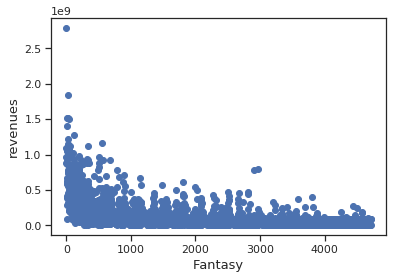

In [1050]:
fig, ax = plt.subplots()
ax.scatter(x = all_data['Fantasy'].index, y =revenues)
plt.ylabel('revenues', fontsize=13)
plt.xlabel('Fantasy', fontsize=13)
plt.show()



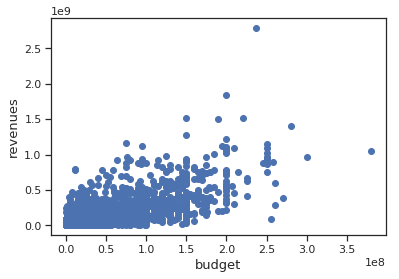

In [1053]:
fig, ax = plt.subplots()
ax.scatter(x = all_data['budget'], y =revenues)
plt.ylabel('revenues', fontsize=13)
plt.xlabel('budget', fontsize=13)
plt.show()



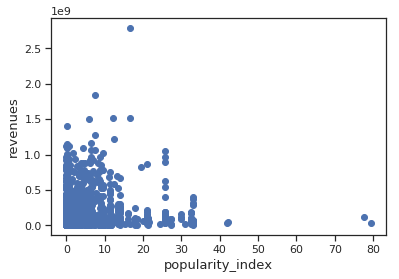

In [1054]:
fig, ax = plt.subplots()
ax.scatter(x = all_data['popularity_index'], y =revenues)
plt.ylabel('revenues', fontsize=13)
plt.xlabel('popularity_index', fontsize=13)
plt.show()



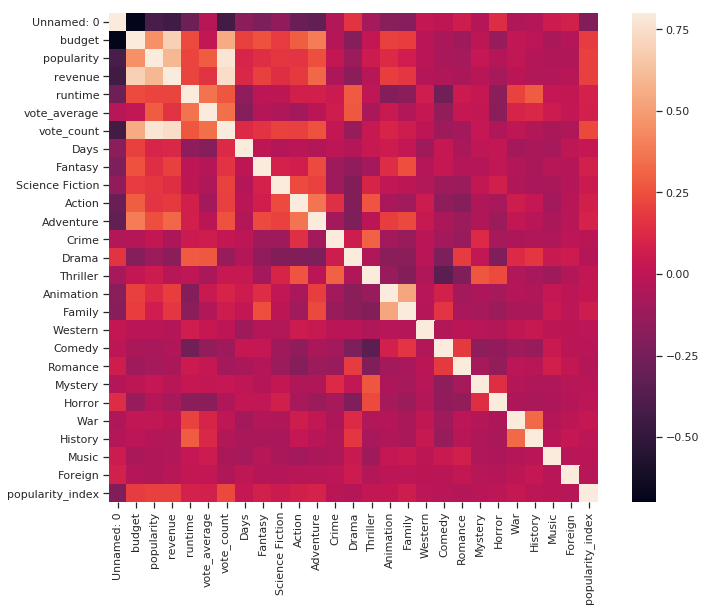

In [1058]:
tempimport = pd.read_csv('./all_data.csv')
corrmat = tempimport.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [1059]:
corrmat["revenue"].sort_values(ascending=False)

revenue             1.000000
vote_count          0.745706
budget              0.694046
popularity          0.598625
Adventure           0.325272
runtime             0.217372
Fantasy             0.202555
popularity_index    0.198922
Animation           0.195348
Action              0.179867
Family              0.170867
vote_average        0.159981
Science Fiction     0.140105
Days                0.115996
War                -0.012422
Mystery            -0.017295
Foreign            -0.020904
Thriller           -0.021073
Western            -0.034239
Music              -0.038731
History            -0.040668
Comedy             -0.044773
Crime              -0.058885
Romance            -0.063122
Horror             -0.079595
Drama              -0.168326
Unnamed: 0         -0.447031
Name: revenue, dtype: float64

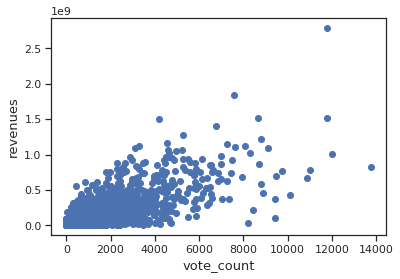

In [1086]:
fig, ax = plt.subplots()
ax.scatter(x = all_data['vote_count'], y =revenues)
plt.ylabel('revenues', fontsize=13)
plt.xlabel('vote_count', fontsize=13)
plt.show()



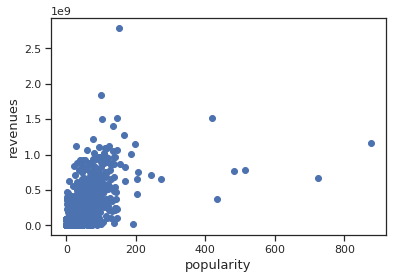

In [1061]:
fig, ax = plt.subplots()
ax.scatter(x = all_data['popularity'], y =revenues)
plt.ylabel('revenues', fontsize=13)
plt.xlabel('popularity', fontsize=13)
plt.show()

In [1088]:
#Trying things:


In [1226]:
new = pd.read_csv('./all_data.csv')

revenues = new['revenue']

del new['revenue']

revenues[:5]

0    2.787965e+09
1    9.610000e+08
2    8.806746e+08
3    1.084939e+09
4    2.841391e+08
Name: revenue, dtype: float64

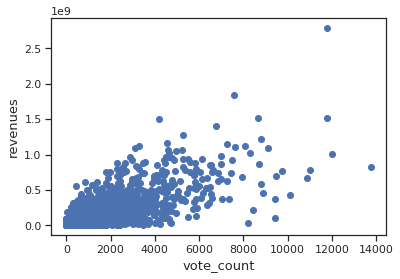

In [1227]:
fig, ax = plt.subplots()
ax.scatter(x = new['vote_count'], y =revenues)
plt.ylabel('revenues', fontsize=13)
plt.xlabel('vote_count', fontsize=13)
plt.show()



In [1228]:
indices = new[(new['vote_count']>13000)].index

In [1229]:
indices

Int64Index([96], dtype='int64')

In [1230]:
new = new.drop(indices)

In [1231]:
revenues = revenues.drop(indices)

In [1232]:
indices = revenues[revenues >2.587965e+09].index

In [1234]:
indices

Int64Index([0], dtype='int64')

In [1235]:
new = new.drop(indices)

In [1236]:
revenues = revenues.drop(indices)

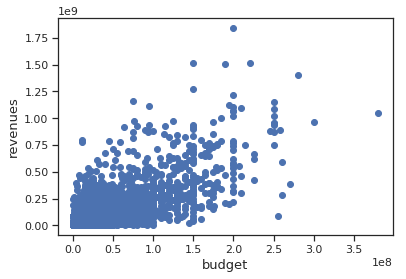

In [1237]:
fig, ax = plt.subplots()
ax.scatter(x = new['budget'], y =revenues)
plt.ylabel('revenues', fontsize=13)
plt.xlabel('budget', fontsize=13)
plt.show()

In [1240]:
for col in new.columns:
    if new[col].isnull().any() == True:
        print(col)
        

In [1239]:
new['runtime'] = new['runtime'].fillna(0)

In [1241]:
from sklearn import preprocessing
new_scaled = preprocessing.scale(new)

scaler = preprocessing.StandardScaler().fit(new)

scaler.transform(new)

array([[-1.73235997,  6.96089711,  3.67950087, ..., -0.20099092,
        -0.08268099,  1.01547966],
       [-1.73162498,  5.51255398,  2.68503764, ..., -0.20099092,
        -0.08268099,  1.00479345],
       [-1.73088999,  5.64422153,  2.83986191, ..., -0.20099092,
        -0.08268099, -0.38542552],
       ...,
       [ 1.73018462, -0.16010485, -0.66646118, ..., -0.20099092,
        -0.08268099, -0.3969862 ],
       [ 1.73091962, -0.93494298, -0.57983705, ..., -0.20099092,
        -0.08268099, -0.38974845],
       [ 1.73165461, -0.16010485, -0.68237673, ..., -0.20099092,
        -0.08268099, -0.178322  ]])

In [1247]:
X_train, X_test, y_train, y_test = train_test_split(new_scaled, revenues, test_size=0.2, random_state=42)


from sklearn import linear_model
model = linear_model.LinearRegression()
#Fit the model
model.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1243]:
model.score(X_test,y_test)

0.6803657071118207

In [1244]:
lasso_m = Lasso()
alpha = [180.31,180.32,180.33]
param_grid = dict(alpha=alpha)
grid_search = GridSearchCV(lasso_m, param_grid, scoring="r2",cv=10)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
model_lasso = grid_search.best_estimator_



model_lasso.score(X_test,y_test)

Best: 0.694323 using {'alpha': 180.33}


0.6803672544074407

In [1252]:
new.to_csv("./Unscaled_data.csv")